In [ ]:
import os

# 将 'desired_path' 替换为你的目标目录的路径
desired_path = '/home/jiaxinyan/code_test/'
os.chdir(desired_path)

# 验证工作目录是否已更改
print(os.getcwd())


/home/jiaxinyan/geoGNNchiENN/Retention-Time-Prediction-for-Chromatographic-Enantioseparation-main/code


   Unnamed: 0  index                                             SMILES    RT  \
0           0      0  O=C(OC)N(C)[C@@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=C...  2.14   
1           1      0  O=C(OC)N(C)[C@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=CC=C2  1.81   
2           2      1      C=CCCCCCCC[C@@H](C[C@@]1(CCCC1=O)c2ccccc2)C=O  0.97   
3           3      2  C[C@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)(F)F  2.13   
4           4      2  C[C@@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)...  2.30   

   Speed  i-PrOH_proportion              Literature Column  MolecularWeight  \
0    0.5           0.050000      10.1039/C9SC04534A    OJ3          319.210   
1    0.5           0.050000      10.1039/C9SC04534A    OJ3          319.210   
2    2.0           0.076923  10.1002/anie.202001100    AD3          340.507   
3    0.5           0.300000      10.1039/C8QO01291A     IA          342.382   
4    0.5           0.300000      10.1039/C8QO01291A     IA          342.382   

   PolarSurfaceArea  ...  Amine  Carbo

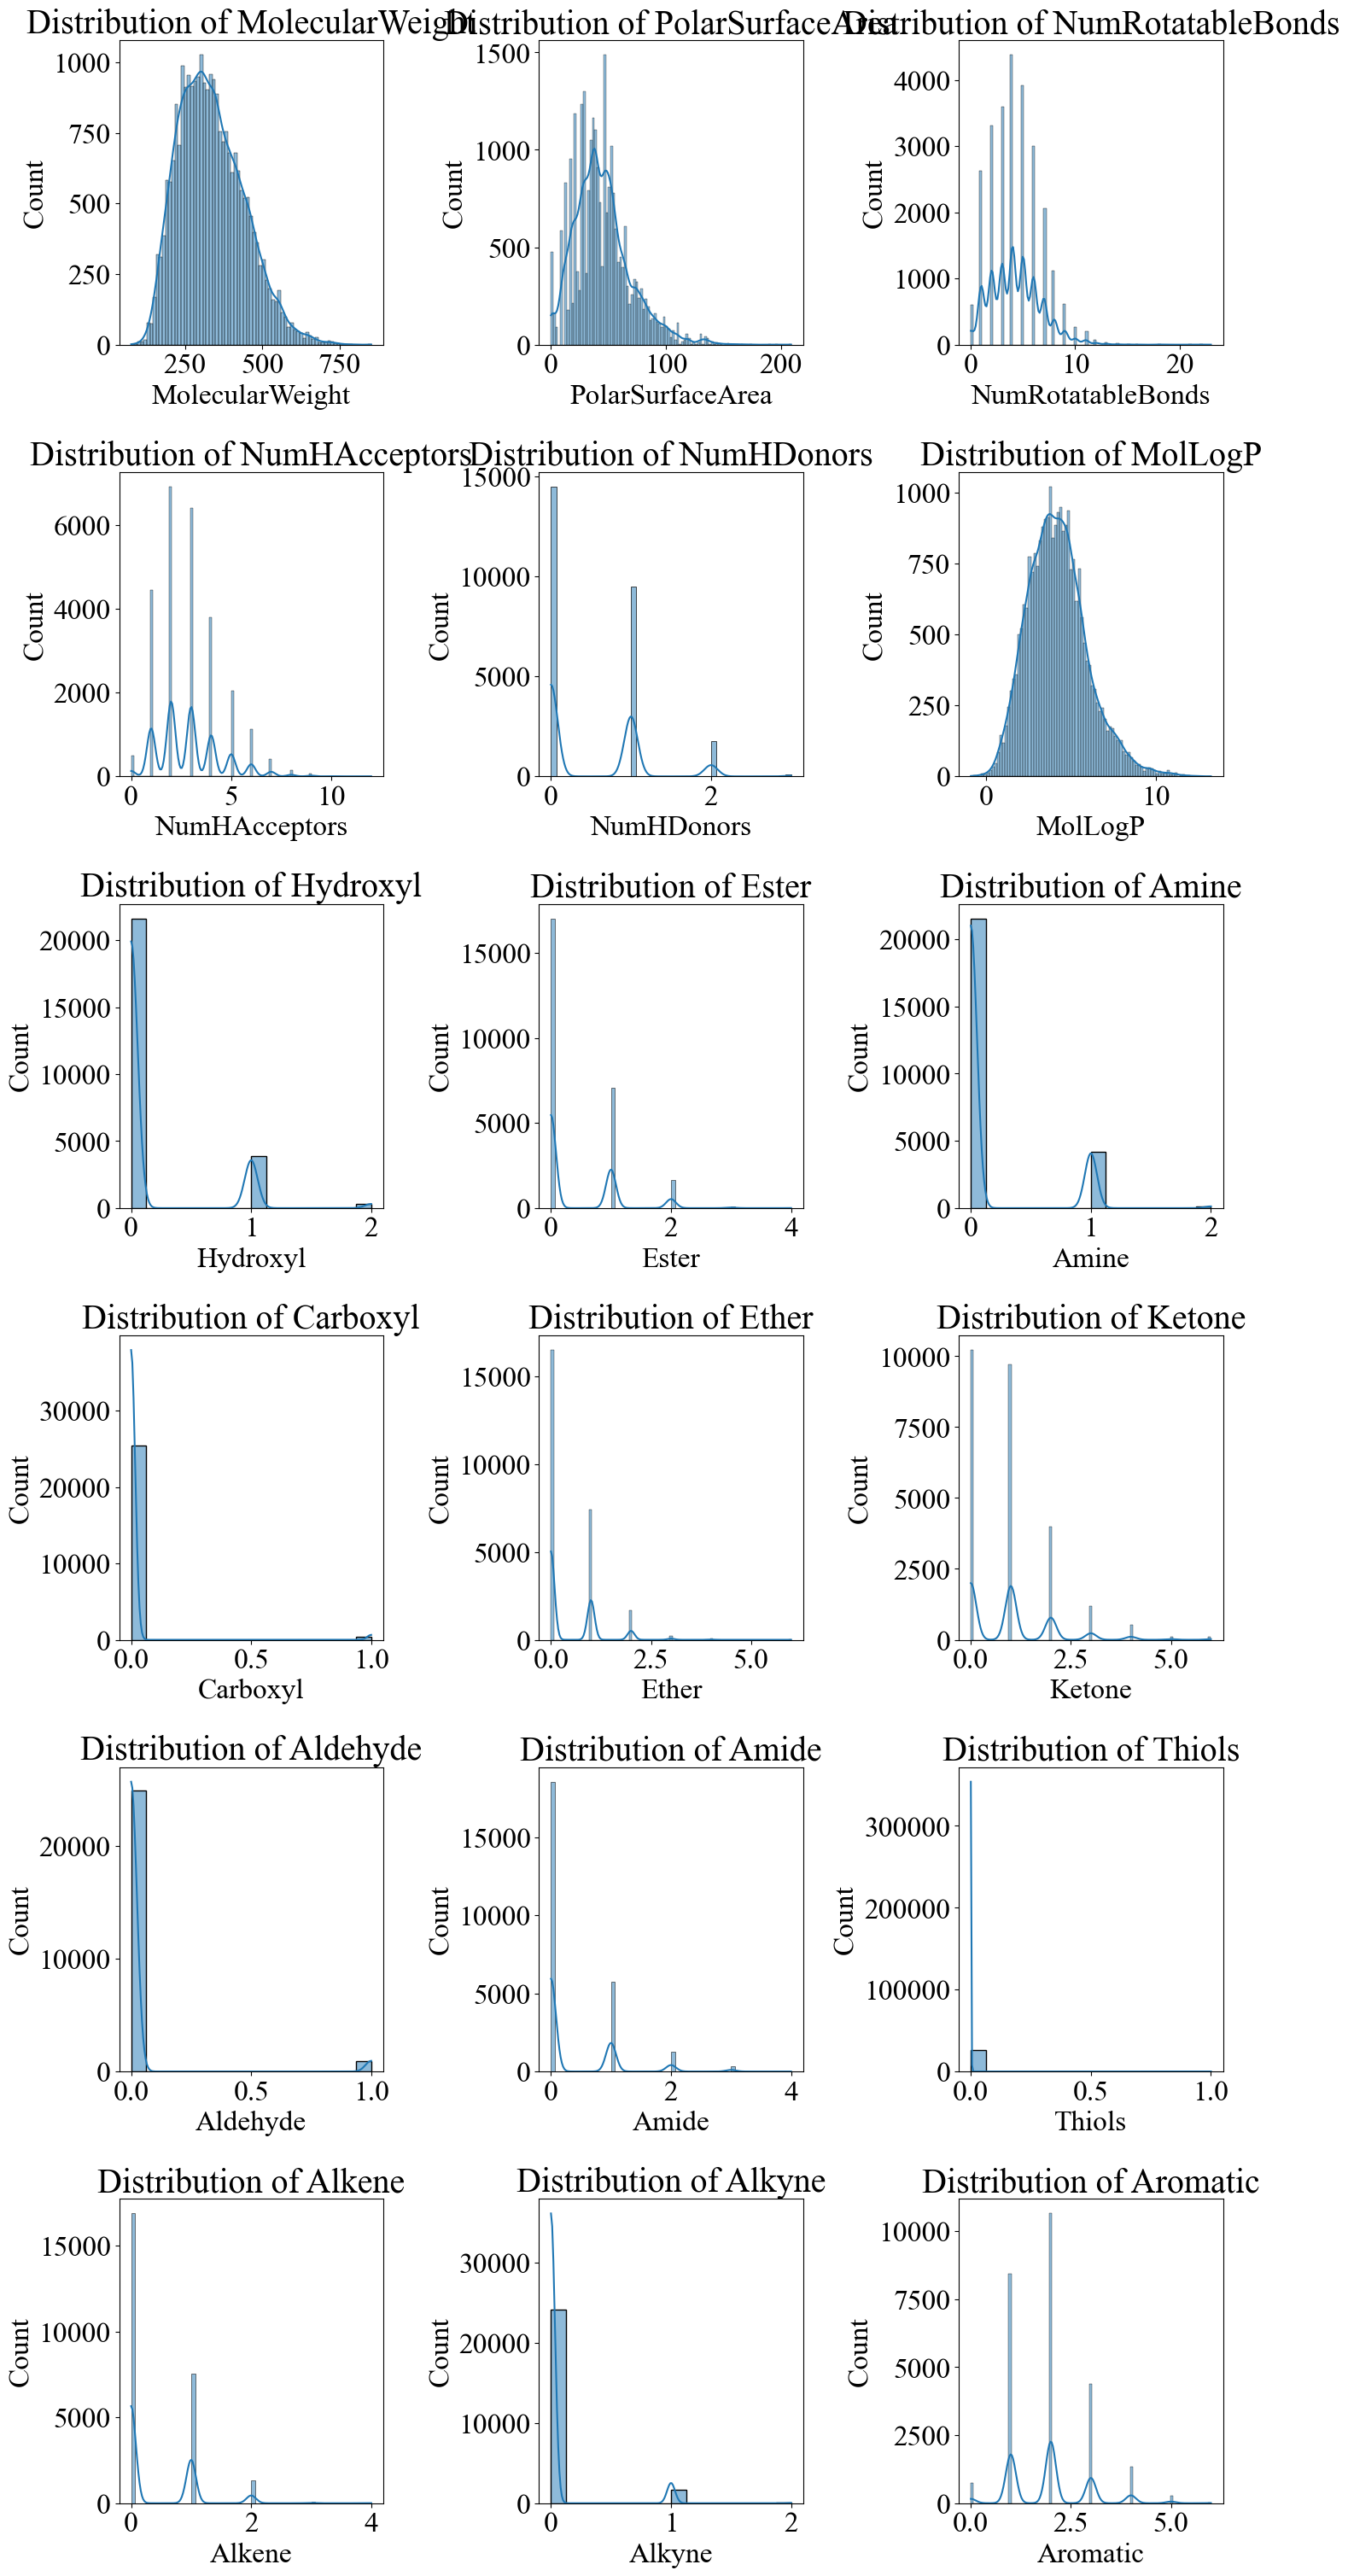

                     count        mean         std      min       25%  \
MolecularWeight    25867.0  335.603924  105.621117  76.0950  255.2825   
PolarSurfaceArea   25867.0   44.577341   24.731303   0.0000   26.3000   
NumRotatableBonds  25867.0    4.301195    2.424969   0.0000    2.0000   
NumHAcceptors      25867.0    2.883210    1.586231   0.0000    2.0000   
NumHDonors         25867.0    0.516295    0.641544   0.0000    0.0000   
MolLogP            25867.0    4.221778    1.763762  -0.8829    2.9686   
Hydroxyl           25867.0    0.176248    0.413540   0.0000    0.0000   
Ester              25867.0    0.414428    0.632301   0.0000    0.0000   
Amine              25867.0    0.171802    0.390411   0.0000    0.0000   
Carboxyl           25867.0    0.016546    0.127566   0.0000    0.0000   
Ether              25867.0    0.449994    0.673132   0.0000    0.0000   
Ketone             25867.0    0.953377    1.049273   0.0000    0.0000   
Aldehyde           25867.0    0.035335    0.184628 

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('/dataset/All_column_charity.csv')  # 替换为实际路径

# Define SMARTS patterns for common functional groups
functional_groups = {
    "Hydroxyl": "[OX2H]",  # -OH
    "Ester": "C(=O)O",  # Ester group
    "Amine": "[NX3;H2,H1;!$(NC=O)]",  # Amine group
    "Carboxyl": "C(=O)[OX2H1]",  # Carboxyl group
    "Ether": "C-O-C",  # Ether group
    "Ketone": "C(=O)[#6]",  # Ketone group
    "Aldehyde": "[CX3H1](=O)[#6]",  # Aldehyde group
    "Amide": "C(=O)N",  # Amide group
    "Thiols": "[SX2H]",  # Thiol group
    "Alkene": "C=C",  # Alkene group
    "Alkyne": "C#C",  # Alkyne group
    "Aromatic": "c1ccccc1",  # Benzene ring
    # Add more functional groups as needed
}

# Function to compute chemical properties and functional groups from SMILES
def compute_properties_and_functional_groups(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    properties = {
        "MolecularWeight": Descriptors.MolWt(mol),
        "PolarSurfaceArea": Descriptors.TPSA(mol),
        "NumRotatableBonds": Descriptors.NumRotatableBonds(mol),
        "NumHAcceptors": Descriptors.NumHAcceptors(mol),
        "NumHDonors": Descriptors.NumHDonors(mol),
        "MolLogP": Descriptors.MolLogP(mol)
    }
    
    # Calculate functional group counts
    for fg_name, fg_smarts in functional_groups.items():
        fg_pattern = Chem.MolFromSmarts(fg_smarts)
        fg_count = len(mol.GetSubstructMatches(fg_pattern))
        properties[fg_name] = fg_count

    return properties

# Apply the function to the SMILES column
chemical_properties = data['SMILES'].apply(compute_properties_and_functional_groups)

# Convert the properties to a DataFrame
properties_df = pd.DataFrame(chemical_properties.tolist())

# Concatenate the properties DataFrame with the original data
result_df = pd.concat([data, properties_df], axis=1)

# Save the result to a new CSV file
result_df.to_csv('chemical_properties_with_functional_groups.csv', index=False)

# Display the first few rows of the result
print(result_df.head())

# Statistical description of the chemical properties
stats = properties_df.describe()
print(stats)

# Visualize distributions
num_columns = len(properties_df.columns)
num_rows = (num_columns // 3) + 1

plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(properties_df.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(properties_df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.savefig('chemical_properties_distributions.png')
plt.show()

# Detailed descriptive statistics
detailed_stats = properties_df.describe().transpose()
detailed_stats['range'] = detailed_stats['max'] - detailed_stats['min']
detailed_stats['Q1'] = properties_df.quantile(0.25)
detailed_stats['Q3'] = properties_df.quantile(0.75)
detailed_stats['IQR'] = detailed_stats['Q3'] - detailed_stats['Q1']
detailed_stats['outliers'] = properties_df.apply(lambda x: ((x < (detailed_stats.loc[x.name, 'Q1'] - 1.5 * detailed_stats.loc[x.name, 'IQR'])) | (x > (detailed_stats.loc[x.name, 'Q3'] + 1.5 * detailed_stats.loc[x.name, 'IQR']))).sum(), axis=0)

# Display detailed descriptive statistics
print(detailed_stats)

# Frequency distribution of functional groups
frequency_distributions = {}
for fg in functional_groups.keys():
    frequency_distributions[fg] = properties_df[fg].value_counts().sort_index()

# Print frequency distributions
for fg, freq in frequency_distributions.items():
    print(f"\nFrequency distribution for {fg}:")
    print(freq)

# Save the detailed descriptive statistics to a CSV file
detailed_stats.to_csv('detailed_descriptive_statistics.csv')


[0. 1. 2. 3. 4.]
[0.35 1.35 2.35 3.35 4.35]


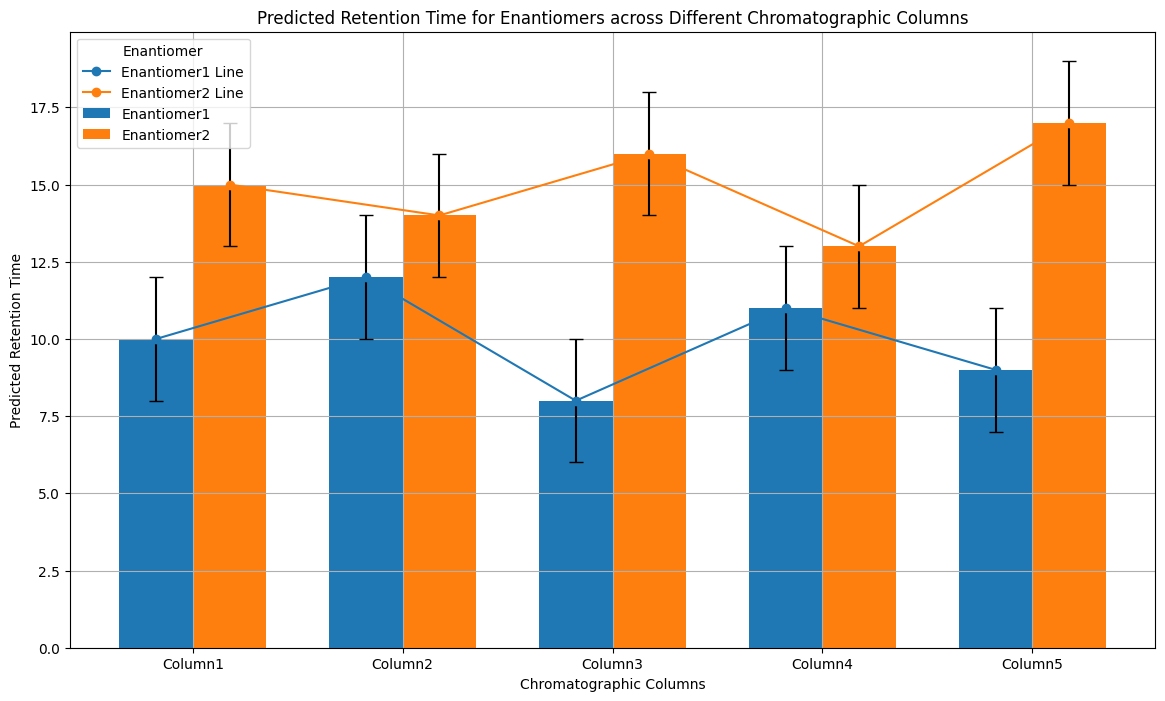

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 示例数据
chromatographic_columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5']
enantiomers = ['Enantiomer1', 'Enantiomer2']

# 假设每对对映体在每个色谱柱上的预测保留时间 [RT10, RT, RT90]
predicted_times = {
    'Column1': {'Enantiomer1': [8, 10, 12], 'Enantiomer2': [13, 15, 17]},
    'Column2': {'Enantiomer1': [10, 12, 14], 'Enantiomer2': [12, 14, 16]},
    'Column3': {'Enantiomer1': [6, 8, 10], 'Enantiomer2': [14, 16, 18]},
    'Column4': {'Enantiomer1': [9, 11, 13], 'Enantiomer2': [11, 13, 15]},
    'Column5': {'Enantiomer1': [7, 9, 11], 'Enantiomer2': [15, 17, 19]}
}

# 转换为DataFrame
data = []
for col, times in predicted_times.items():
    for enantiomer, (RT10, RT, RT90) in times.items():
        data.append([col, enantiomer, RT10, RT, RT90])

df = pd.DataFrame(data, columns=['Column', 'Enantiomer', 'RT10', 'RT', 'RT90'])

# 绘制条形图带误差条和折线
fig, ax = plt.subplots(figsize=(14, 8))

width = 0.35  # 条形图的宽度
x = np.arange(len(chromatographic_columns))  # 色谱柱的位置

# 记录每个色谱柱下的保留时间，以绘制折线
lines = {enantiomer: [] for enantiomer in enantiomers}

for i, enantiomer in enumerate(enantiomers):
    subset = df[df['Enantiomer'] == enantiomer]
    bar_positions = x + i * width  # 条形的位置
    center_positions = bar_positions  # 中心位置
    ax.bar(
        bar_positions, subset['RT'], width,
        yerr=[subset['RT'] - subset['RT10'], subset['RT90'] - subset['RT']],
        label=enantiomer, capsize=5
    )
    lines[enantiomer] = (center_positions, subset['RT'].values)

# 绘制折线
for enantiomer, (positions, values) in lines.items():
    ax.plot(positions, values, marker='o', linestyle='-', label=f'{enantiomer} Line')

ax.set_xlabel('Chromatographic Columns')
ax.set_ylabel('Predicted Retention Time')
ax.set_title('Predicted Retention Time for Enantiomers across Different Chromatographic Columns')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(chromatographic_columns)
ax.legend(title='Enantiomer')

plt.grid(True)
plt.show()




[[0.         0.0148248  0.         ... 0.         0.         0.        ]
 [0.01196076 0.         0.0126827  ... 0.         0.         0.        ]
 [0.         0.04085187 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Adjacency matrix saved as adjacency_matrix.csv
[ 0.30523937  0.07273422  0.14588551  0.18511391  0.08639477  0.03870826
  0.07489949  0.01231855  0.0995437   0.29349087  0.11335367  0.07609618
  0.01231898  0.07489928  0.13632137  0.06365124  0.27567004  0.1147583
  0.07512781  0.0920531   0.0353326  -0.04301693  0.1624805   0.00433012
  0.00873397  0.03451192  0.01462224  0.0345116   0.00873397 -0.23766243
 -0.0786145  -0.00394204  0.00727641 -0.11374175 -0.23644288  0.09281794
  0.09281805  0.09281783  0.01948036 -0.02244918 -0.02244907  0.01948036

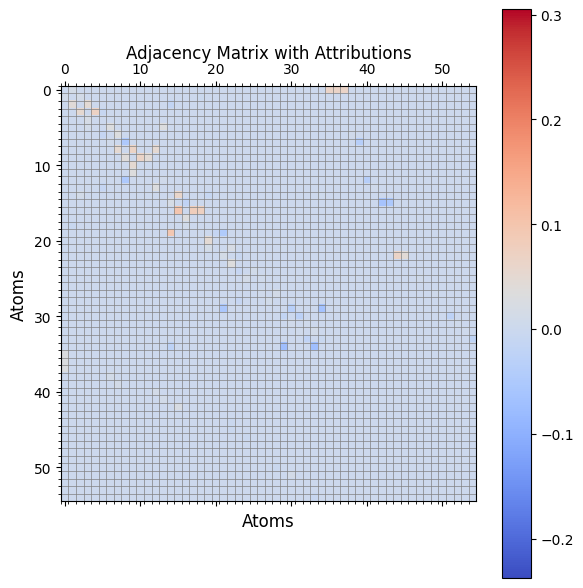

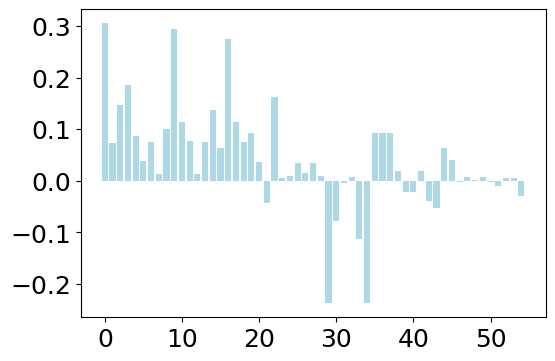

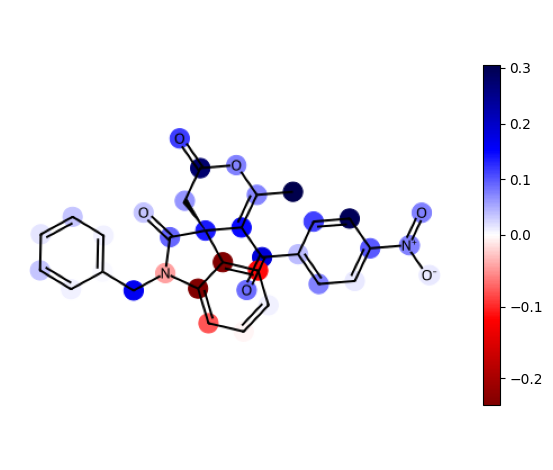

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.cm as cm
import os
from PIL import Image
import io
import matplotlib.colors as mcolors

def atom_attribution_visualize(smiles, atom_attribution, save_path='./image', cmap_name='seismic_r', show_values=False):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.RemoveHs(mol)  # 不显示氢原子
    cmap = plt.get_cmap(cmap_name)
    norm = mcolors.TwoSlopeNorm(vmin=min(atom_attribution), vcenter=0, vmax=max(atom_attribution))
    plt_colors = cm.ScalarMappable(norm=norm, cmap=cmap)
    highlight_atom_colors = {}
    atom_radii = {}

    for i in range(mol.GetNumAtoms()):
        highlight_atom_colors[i] = [plt_colors.to_rgba(float(atom_attribution[i]))]
        atom_radii[i] = 0.4

    rdDepictor.Compute2DCoords(mol)

    # 绘制分子图，标记原子贡献
    drawer = rdMolDraw2D.MolDraw2DCairo(400, 400)
    dos = drawer.drawOptions()
    dos.useBWAtomPalette()
    drawer.DrawMoleculeWithHighlights(mol, '', highlight_atom_colors, {}, atom_radii, {})
    drawer.FinishDrawing()
    png = drawer.GetDrawingText()

    if not os.path.exists(save_path):
        os.makedirs(save_path)
    with open(os.path.join(save_path, f'{smiles}_atom.png'), 'wb') as f:
        f.write(png)

    # 从文件读取图像以进行显示
    image = Image.open(io.BytesIO(png))

    # 在图中添加 colorbar 和原子贡献值
    fig, ax = plt.subplots()
    ax.imshow(image, aspect='equal')
    ax.axis('off')

    if show_values:
        # 在图中添加原子贡献值
        for i in range(mol.GetNumAtoms()):
            pos = mol.GetConformer().GetAtomPosition(i)
            ax.text(pos.x, pos.y, f'{atom_attribution[i]:.2f}', fontsize=8, color='black')

    # 添加 colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)

    plt.tight_layout()
    #plt.savefig(os.path.join(save_path, f'{smiles}_with_values.png'), bbox_inches='tight', pad_inches=0.1)
    plt.show()

    return png

def visualize_from_npy(file_path, save_path='./image'):
    data = np.load(file_path, allow_pickle=True).item()
    adjacency = data['adjacency']
    print(adjacency)
    np.savetxt('adjacency_matrix.csv', adjacency, delimiter=',')
    print("Adjacency matrix saved as adjacency_matrix.csv")
    atom_contributions = data['atom_contributions']
    print(atom_contributions)
    np.savetxt('atom_contributions.csv', atom_contributions, delimiter=',')
    # 提取 SMILES 字符串
    smiles = os.path.basename(file_path).replace('.npy', '')

    # 绘制邻接矩阵
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', labelsize=10)

    ax.set_xticks(np.arange(0, adjacency.shape[0], 1))
    ax.set_yticks(np.arange(0, adjacency.shape[0], 1))

    ax.set_xticklabels(np.arange(0, adjacency.shape[0], 1), fontsize=10)
    ax.set_yticklabels(np.arange(0, adjacency.shape[0], 1), fontsize=10)

    ax.set_xticks(np.arange(-.5, adjacency.shape[0] - 1, 1), minor=True)
    ax.set_yticks(np.arange(-.5, adjacency.shape[0] - 1, 1), minor=True)

    ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

    cax = ax.matshow(adjacency, cmap='coolwarm', vmin=min(atom_contributions), vmax=max(atom_contributions))
    plt.colorbar(cax)
    plt.title('Adjacency Matrix with Attributions', pad=20, fontsize=12)
    plt.xlabel('Atoms', fontsize=12)
    plt.ylabel('Atoms', fontsize=12)
    plt.tight_layout()
    #plt.savefig(os.path.join(save_path, f'{smiles}_adjacency.png'), bbox_inches='tight', pad_inches=0.1)
    plt.show()
    plt.figure(figsize=(6, 4))
    # cmap = plt.get_cmap('coolwarm')
    # norm = matplotlib.colors.Normalize(vmin=min(atom_contributions), vmax=max(atom_contributions))
    # colors = [cmap(norm(contribution)) for contribution in atom_contributions]
        
    # plt.bar(range(len(atom_contributions)), atom_contributions, color=colors)
    plt.bar(range(len(atom_contributions)), atom_contributions, color='#ADD8E6')
    #plt.xticks(np.arange(0, len(atom_contributions)+1, 5))
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    # plt.xlabel('Atom Index')
    # plt.ylabel('Contribution')
    #plt.title(f'Atom Contributions for {smiles_list[i]}')
    plt.show()
    # 可视化分子图上的原子贡献
    atom_attribution_visualize(smiles, atom_contributions, save_path=save_path, show_values=False)

# 示例用法
visualize_from_npy('/fig_save/CC1=C(C(=O)c2ccc(cc2)[N+]([O-])=O)[C@@]3(CC(=O)O1)C(=O)N(Cc4ccccc4)c5ccccc35.npy', save_path='./fig_save')

In [ ]:
import pandas as pd

# Load the data
file_path = '/dataset/All_column_charity.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

Unnamed: 0  index                                             SMILES    RT  \
0           0      0  O=C(OC)N(C)[C@@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=C...  2.14   
1           1      0  O=C(OC)N(C)[C@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=CC=C2  1.81   
2           2      1      C=CCCCCCCC[C@@H](C[C@@]1(CCCC1=O)c2ccccc2)C=O  0.97   
3           3      2  C[C@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)(F)F  2.13   
4           4      2  C[C@@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)...  2.30   

   Speed  i-PrOH_proportion              Literature Column  
0    0.5           0.050000      10.1039/C9SC04534A    OJ3  
1    0.5           0.050000      10.1039/C9SC04534A    OJ3  
2    2.0           0.076923  10.1002/anie.202001100    AD3  
3    0.5           0.300000      10.1039/C8QO01291A     IA  
4    0.5           0.300000      10.1039/C8QO01291A     IA

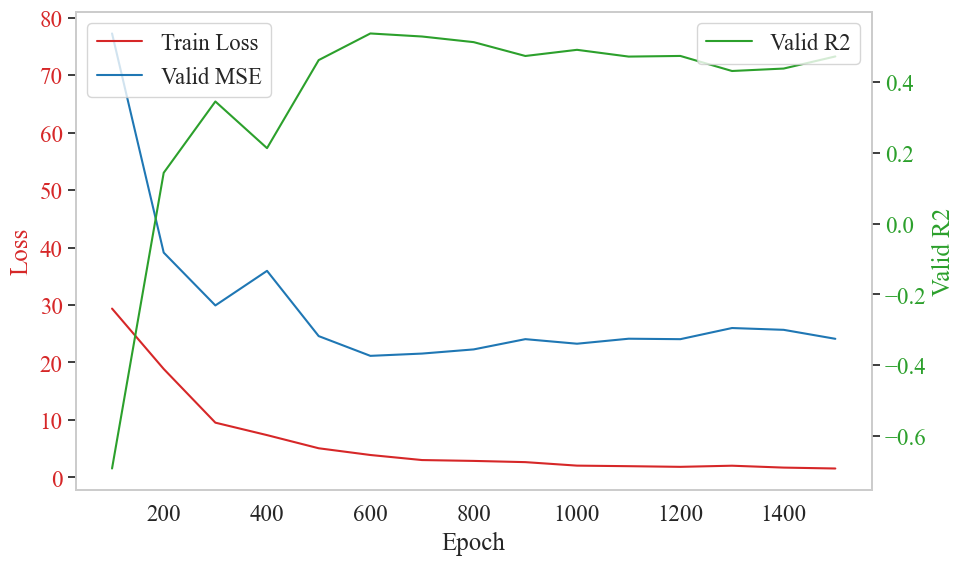

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
column_name = 'IA'  # 替换为您的列名
file_path = f'/saves/model_{column_name}CHI/record.csv'  # 替换为您的CSV文件路径
df = pd.read_csv(file_path)

# 处理数据
df['Valid R2'] = df['Valid R2'].apply(lambda x: float(x.split('(')[-1].rstrip(')')))

# 设置全局字体为新罗马，字体大小为18
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 18})

# 创建图形和双Y轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制Train Loss曲线
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(df['Epoch'], df['Train Loss'], color=color, label='Train Loss')
ax1.plot(df['Epoch'], df['Valid MSE'], color='tab:blue', linestyle='-', label='Valid MSE')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)
# 创建第二个Y轴
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Valid R2', color=color)
ax2.plot(df['Epoch'], df['Valid R2'], color=color, linestyle='-', label='Valid R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)
# 添加图例
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#plt.title(f'Training Loss and Validation Metrics over Epochs ({column_name})')

# 保存图表
plt.savefig(f'/home/jiaxinyan/geoGNNchiENN/Retention-Time-Prediction-for-Chromatographic-Enantioseparation-main/code/figdatadistribution/training_validation_metrics_{column_name}.png', bbox_inches='tight', dpi=300)

# 显示图表
plt.show()




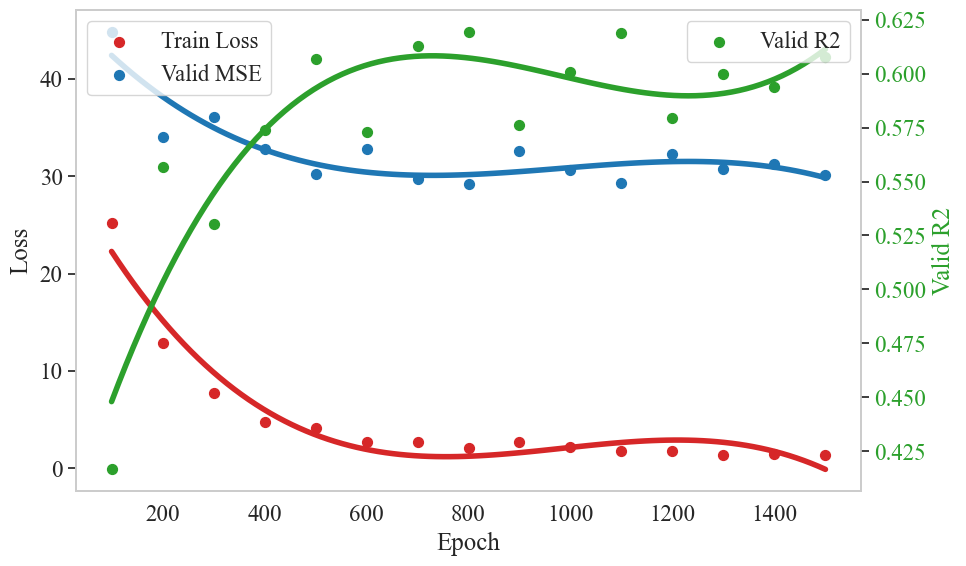

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# 读取CSV文件
column_name = 'ADH'  # 替换为您的列名
file_path = f'saves/model_{column_name}CHI/record.csv'  # 替换为您的CSV文件路径
df = pd.read_csv(file_path)

# 处理数据
df['Valid R2'] = df['Valid R2'].apply(lambda x: float(x.split('(')[-1].rstrip(')')))

# 设置全局字体为新罗马，字体大小为18
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 18})

# 创建图形
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制 Train Loss 数据点
ax1.scatter(df['Epoch'], df['Train Loss'], color='tab:red', label='Train Loss', s=50)

# 对 Train Loss 进行多项式拟合
p_loss = Polynomial.fit(df['Epoch'], df['Train Loss'], deg=3)
x_fit_loss = np.linspace(df['Epoch'].min(), df['Epoch'].max(), 100)
y_fit_loss = p_loss(x_fit_loss)
ax1.plot(x_fit_loss, y_fit_loss, color='tab:red', linewidth=4)  # 拟合曲线加粗

# 绘制 Valid MSE 数据点
ax1.scatter(df['Epoch'], df['Valid MSE'], color='tab:blue', label='Valid MSE', s=50)

# 对 Valid MSE 进行多项式拟合
p_mse = Polynomial.fit(df['Epoch'], df['Valid MSE'], deg=3)
y_fit_mse = p_mse(x_fit_loss)
ax1.plot(x_fit_loss, y_fit_mse, color='tab:blue', linewidth=4)  # 拟合曲线加粗

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.tick_params(axis='y')

# 创建第二个 Y 轴
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Valid R2', color=color)

# 绘制 Valid R2 数据点
ax2.scatter(df['Epoch'], df['Valid R2'], color=color, label='Valid R2', s=50)

# 对 Valid R2 进行多项式拟合
p_r2 = Polynomial.fit(df['Epoch'], df['Valid R2'], deg=3)
y_fit_r2 = p_r2(x_fit_loss)
ax2.plot(x_fit_loss, y_fit_r2, color=color, linewidth=4)  # 拟合曲线加粗

ax2.tick_params(axis='y', labelcolor=color)

# 去掉格点
ax1.grid(False)

# 添加图例
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.grid(False)
# 保存图表
plt.savefig(f'figdatadistribution/training_validation_metrics_{column_name}.png', bbox_inches='tight', dpi=300)

# 显示图表
plt.show()


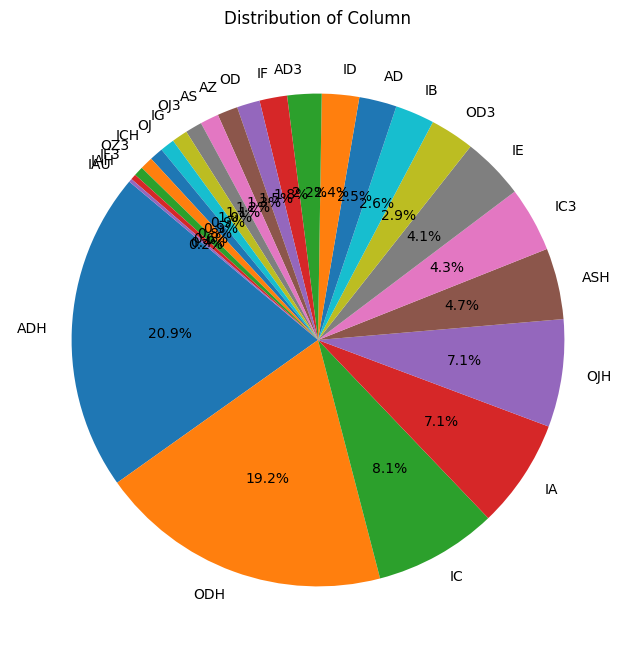

In [4]:
import matplotlib.pyplot as plt

# Example column for pie chart
column_name = 'Column'

# Data for pie chart
pie_data = data[column_name].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {column_name}')
plt.show()


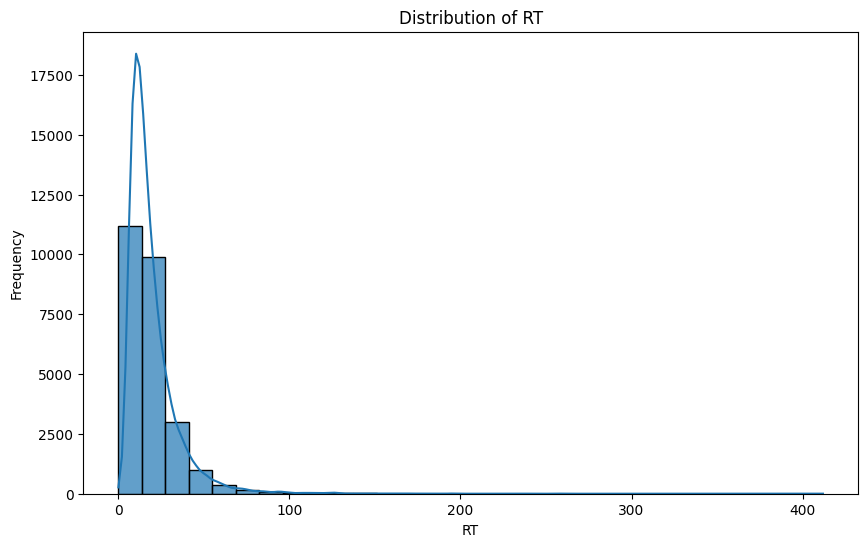

In [9]:
# Example column for distribution plot
distribution_column = 'RT'
import seaborn as sns
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data[distribution_column], bins=30,edgecolor='k',alpha=0.7,kde=True)
#plt.hist(data[distribution_column], bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {distribution_column}')
plt.xlabel(distribution_column)
plt.ylabel('Frequency')
plt.show()


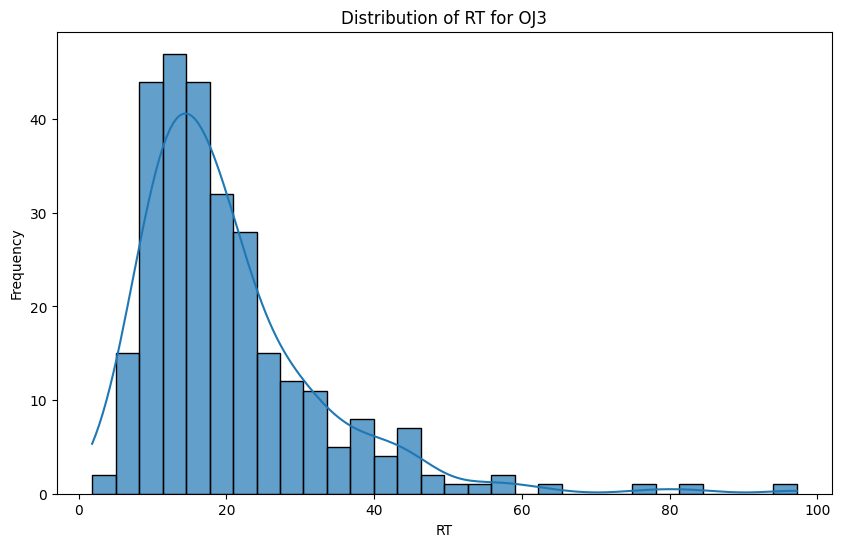

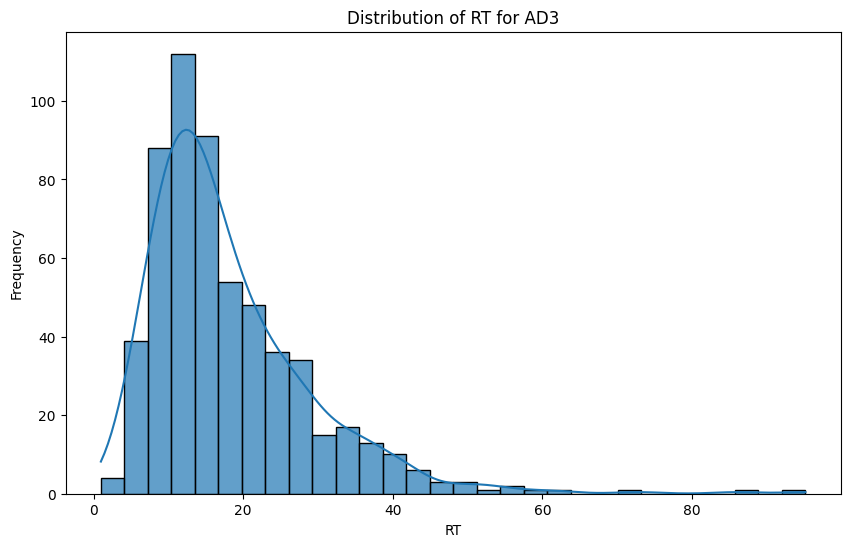

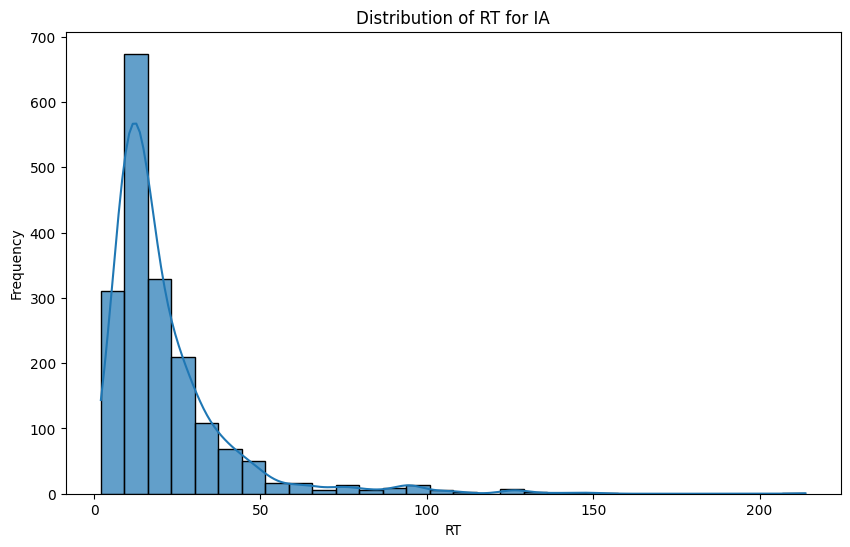

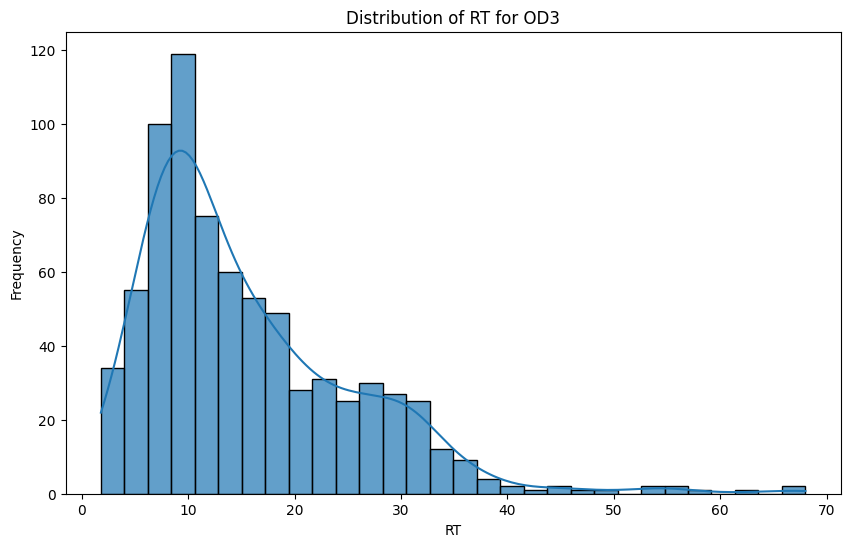

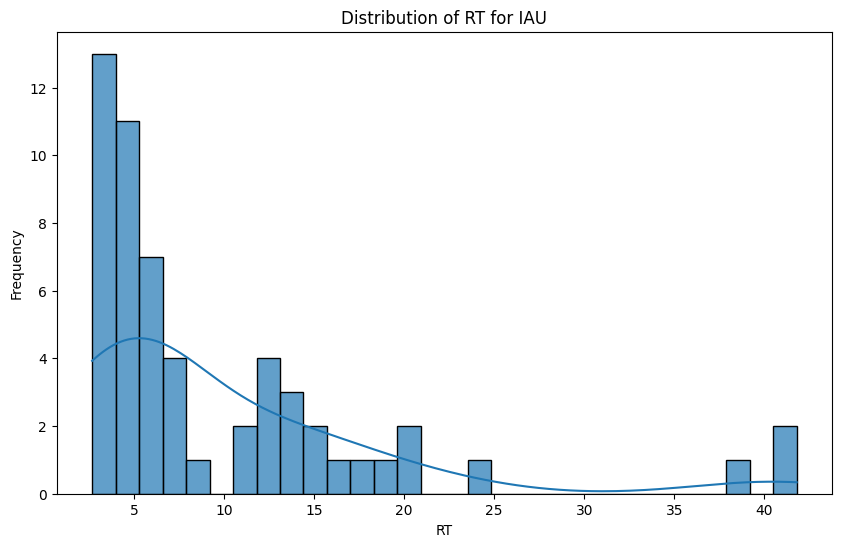

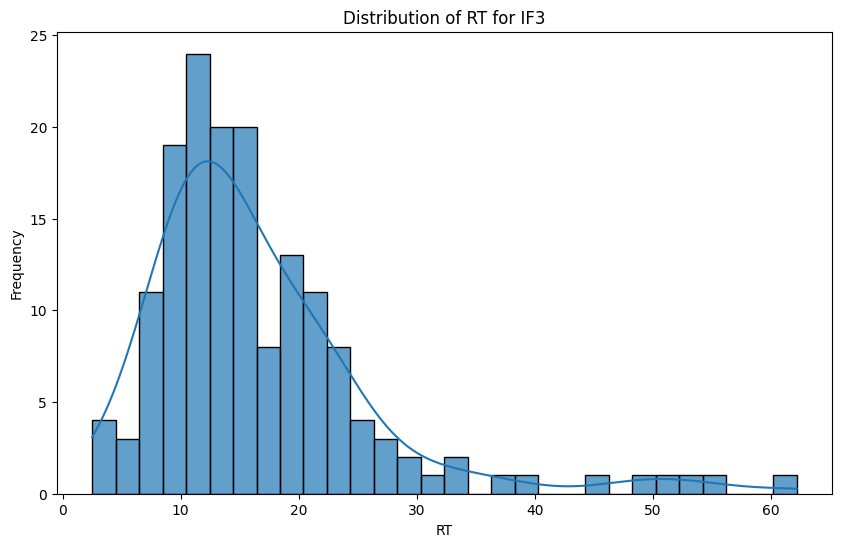

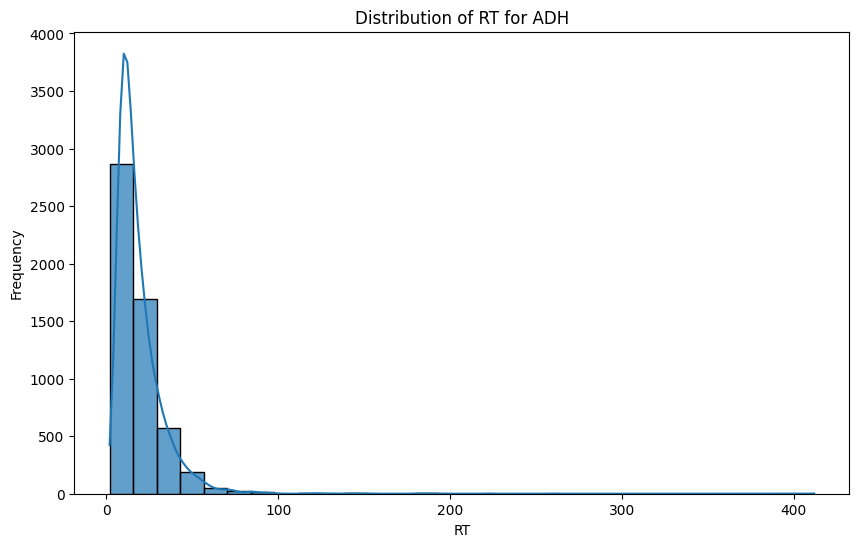

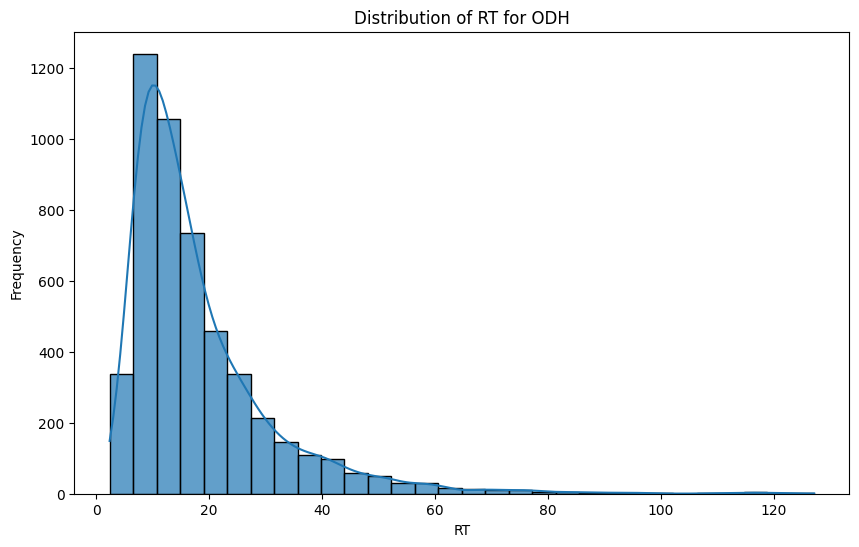

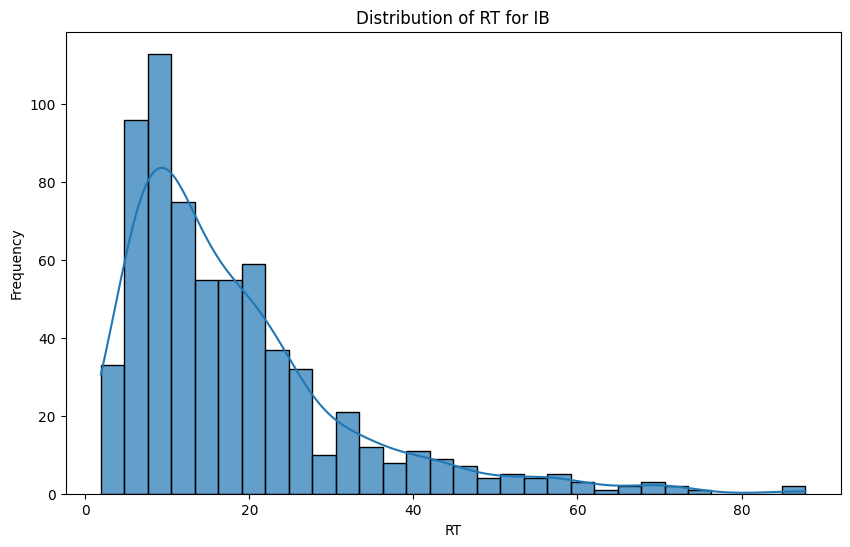

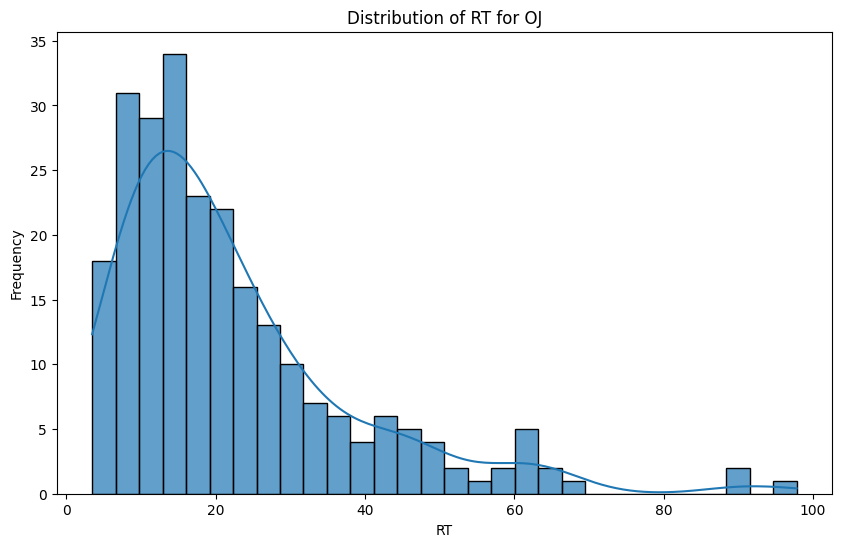

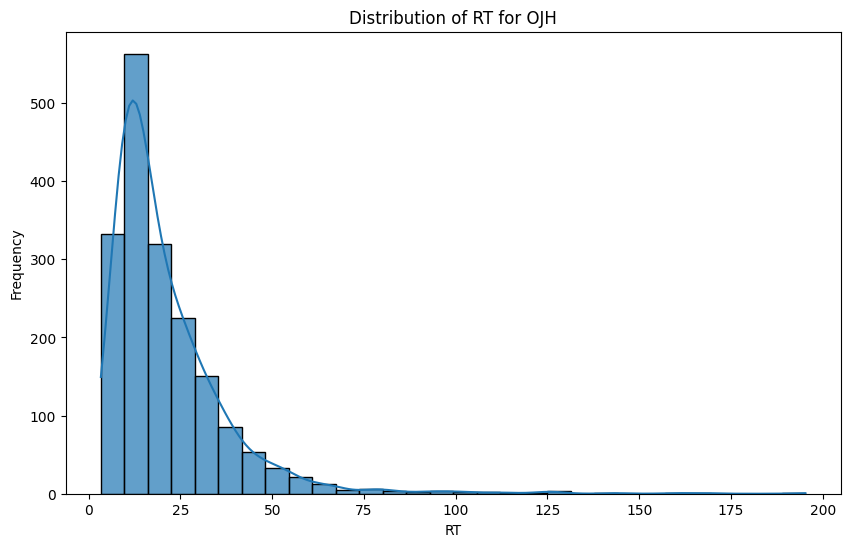

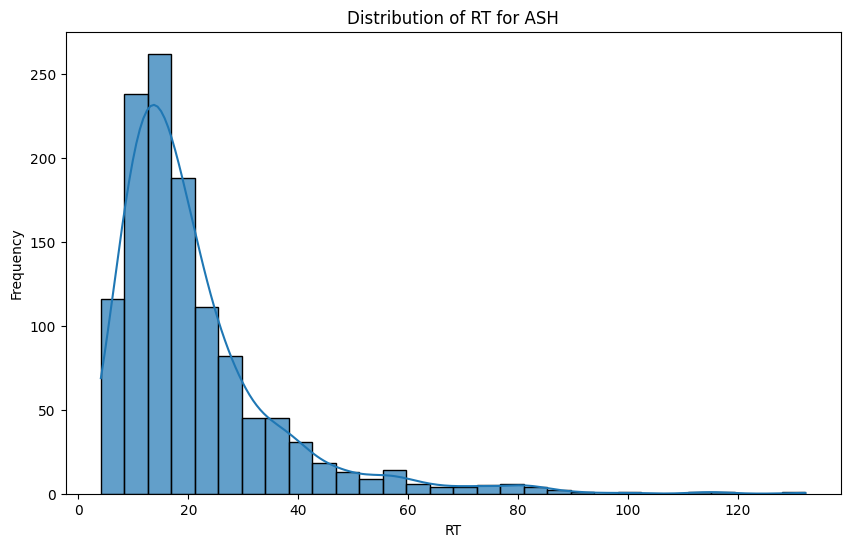

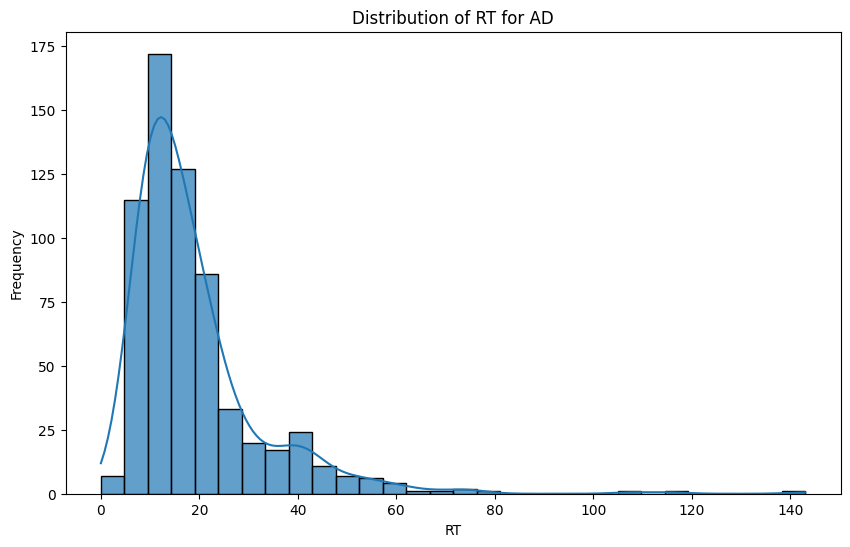

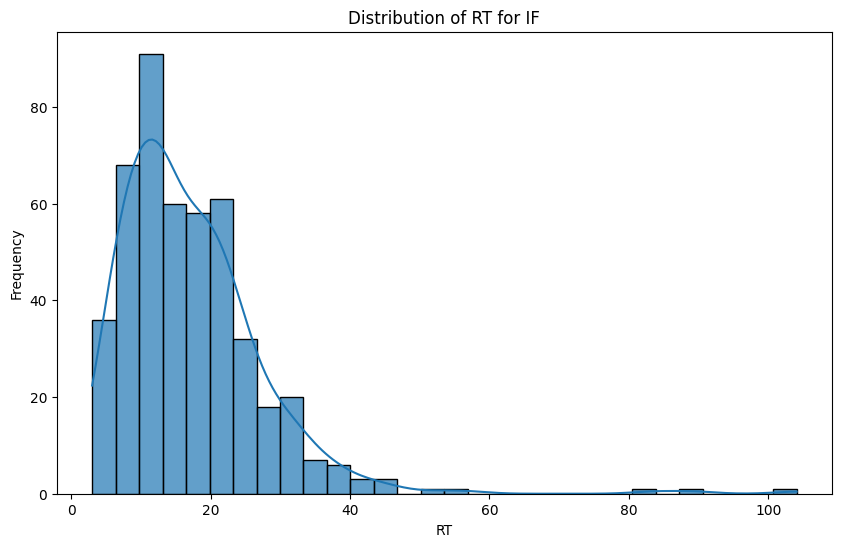

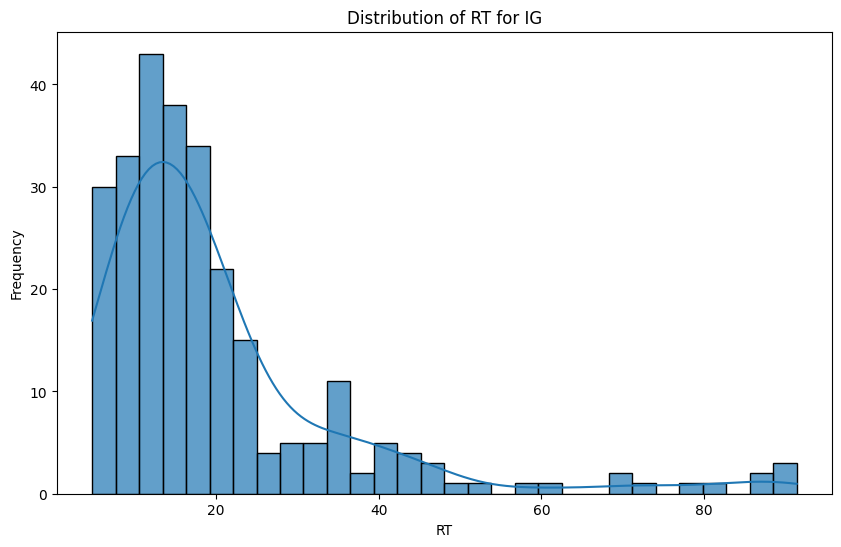

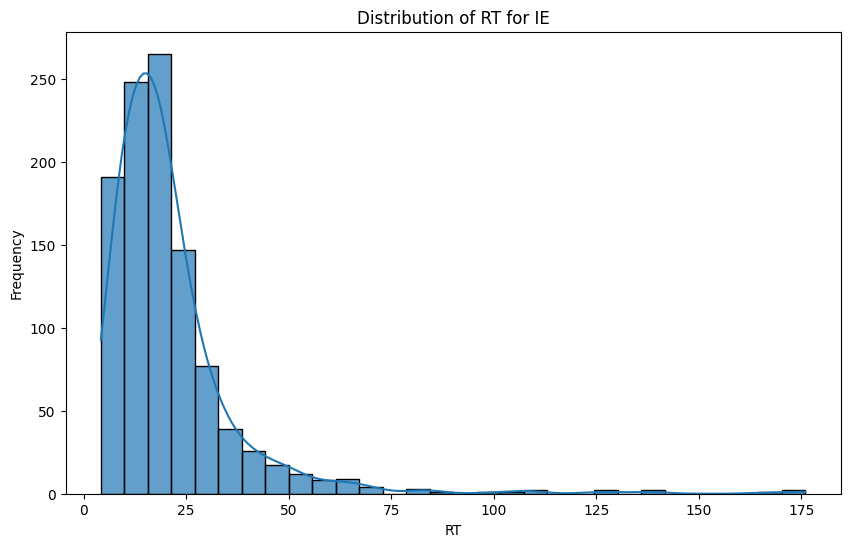

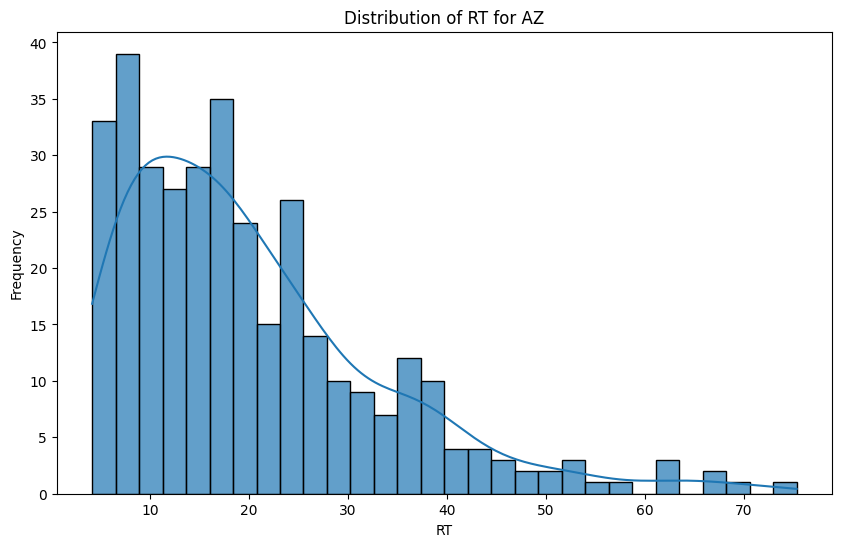

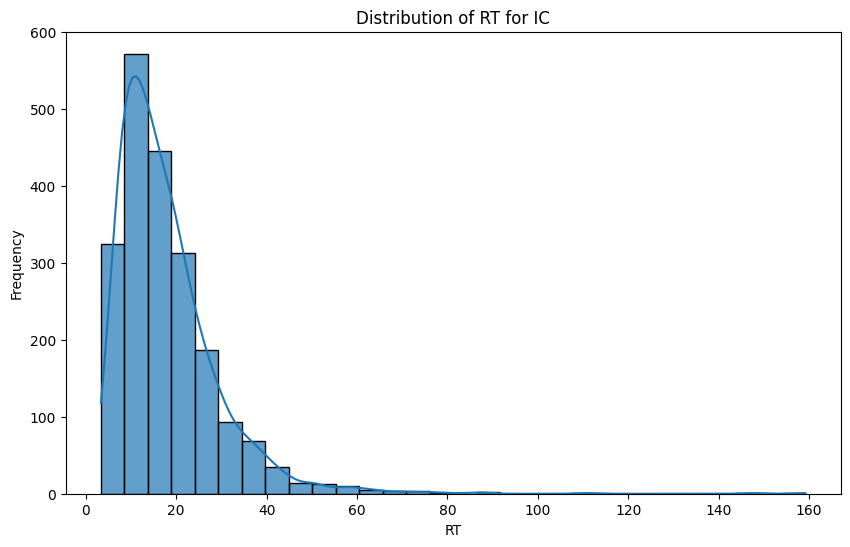

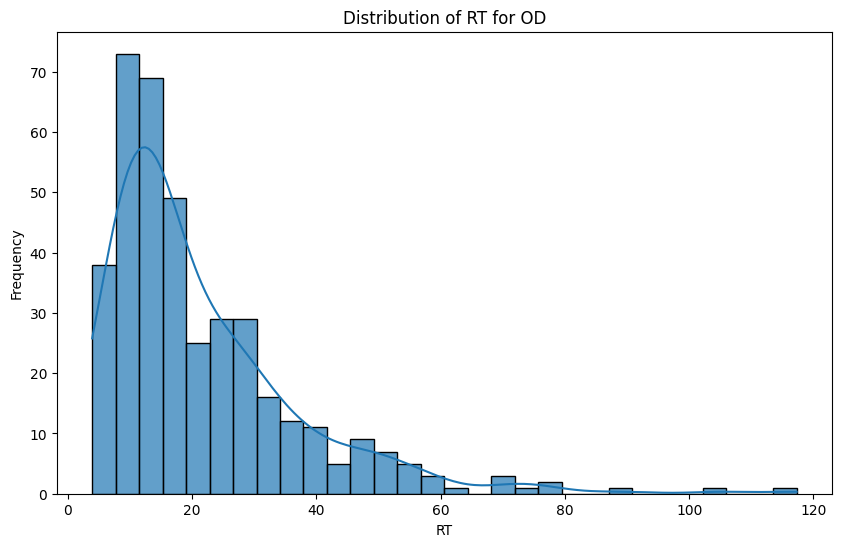

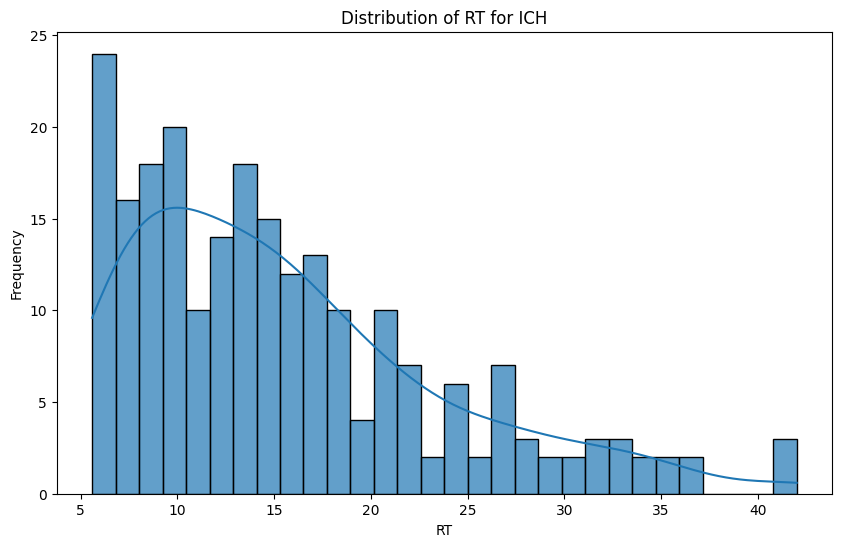

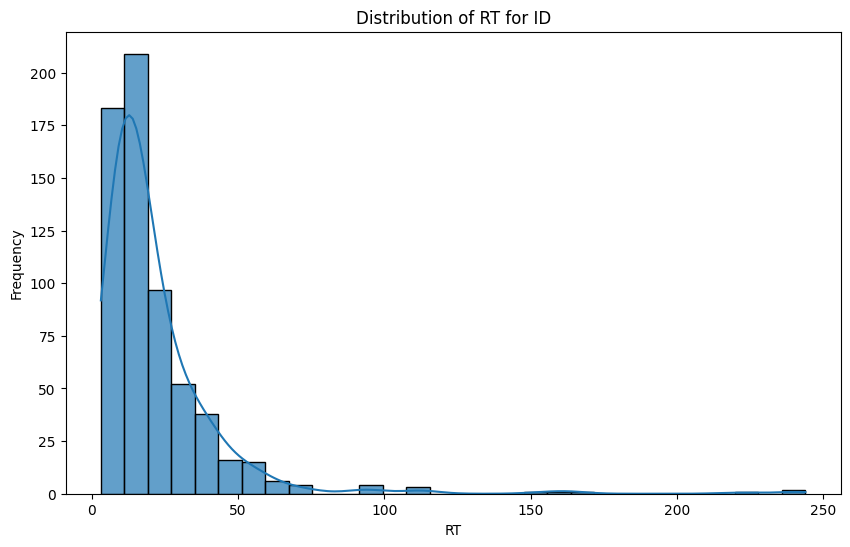

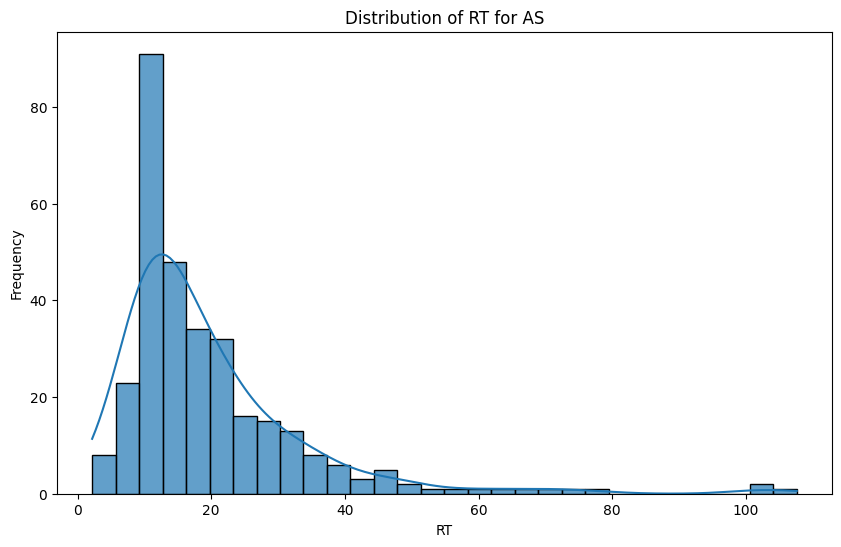

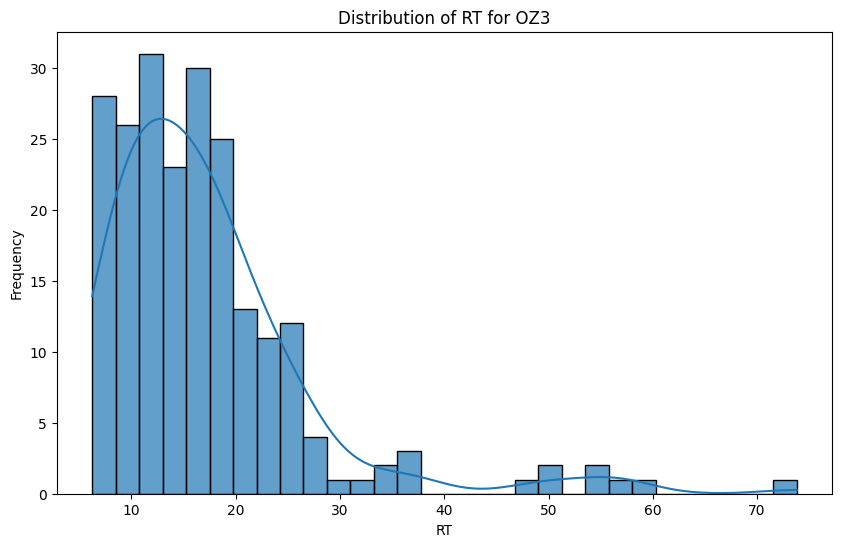

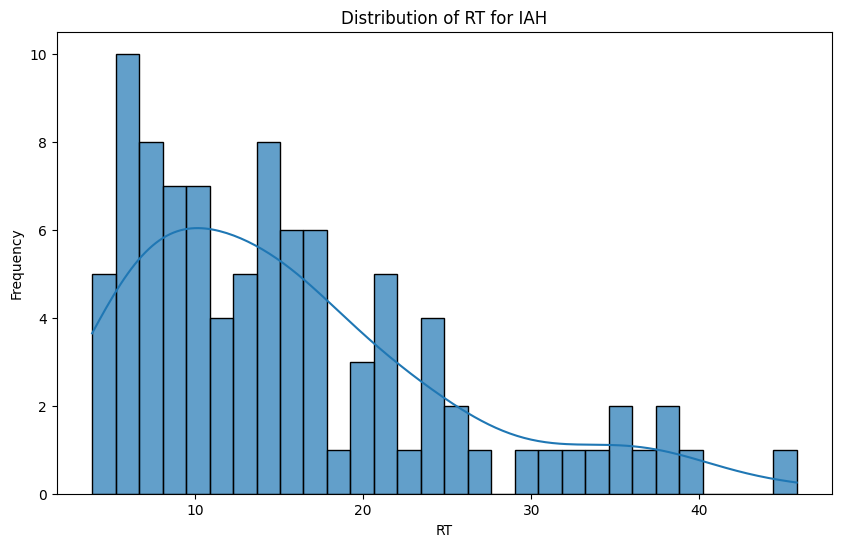

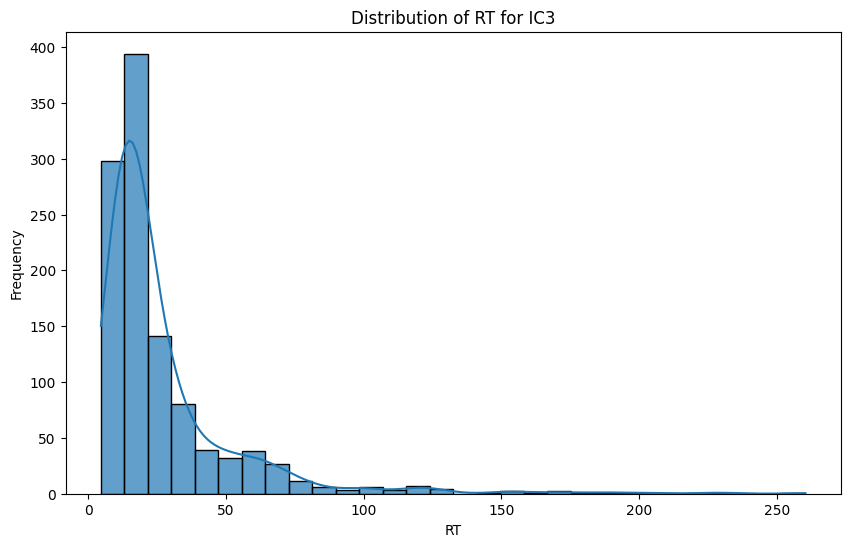

In [15]:
# Distribution Plots for each category
unique_categories = data[column_name].unique()

for category in unique_categories:
    category_data = data[data[column_name] == category][distribution_column]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(category_data, bins=30,edgecolor='k',alpha=0.7,kde=True)
    #plt.hist(category_data, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {distribution_column} for {category}')
    plt.xlabel(distribution_column)
    plt.ylabel('Frequency')
    plt.show()

   Unnamed: 0  index                                             SMILES    RT  \
0           0      0  O=C(OC)N(C)[C@@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=C...  2.14   
1           1      0  O=C(OC)N(C)[C@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=CC=C2  1.81   
2           2      1      C=CCCCCCCC[C@@H](C[C@@]1(CCCC1=O)c2ccccc2)C=O  0.97   
3           3      2  C[C@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)(F)F  2.13   
4           4      2  C[C@@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)...  2.30   

   Speed  i-PrOH_proportion              Literature Column  
0    0.5           0.050000      10.1039/C9SC04534A    OJ3  
1    0.5           0.050000      10.1039/C9SC04534A    OJ3  
2    2.0           0.076923  10.1002/anie.202001100    AD3  
3    0.5           0.300000      10.1039/C8QO01291A     IA  
4    0.5           0.300000      10.1039/C8QO01291A     IA  


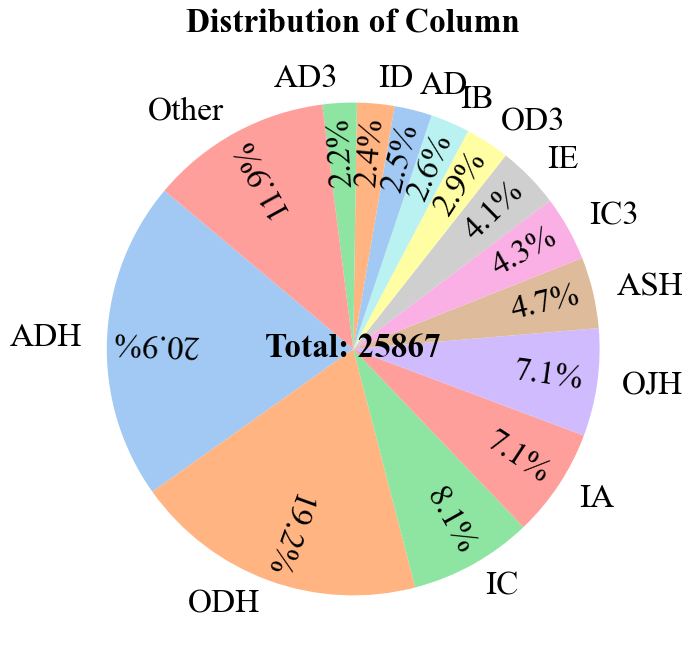

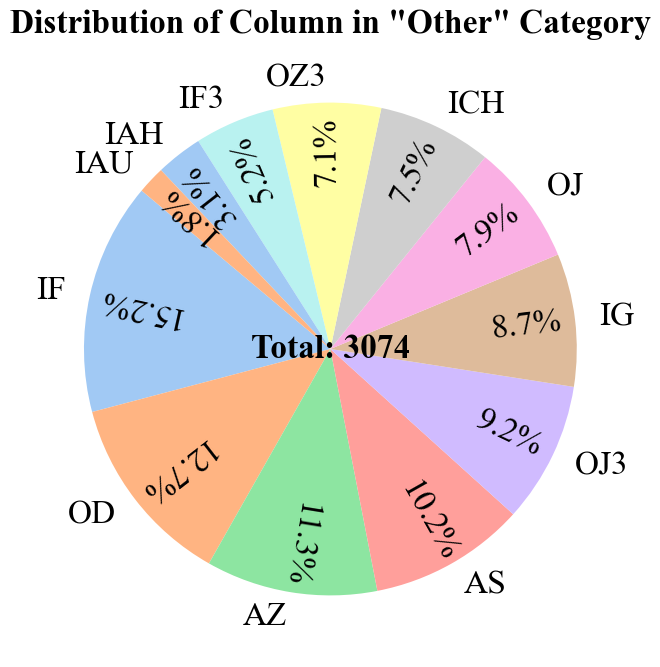

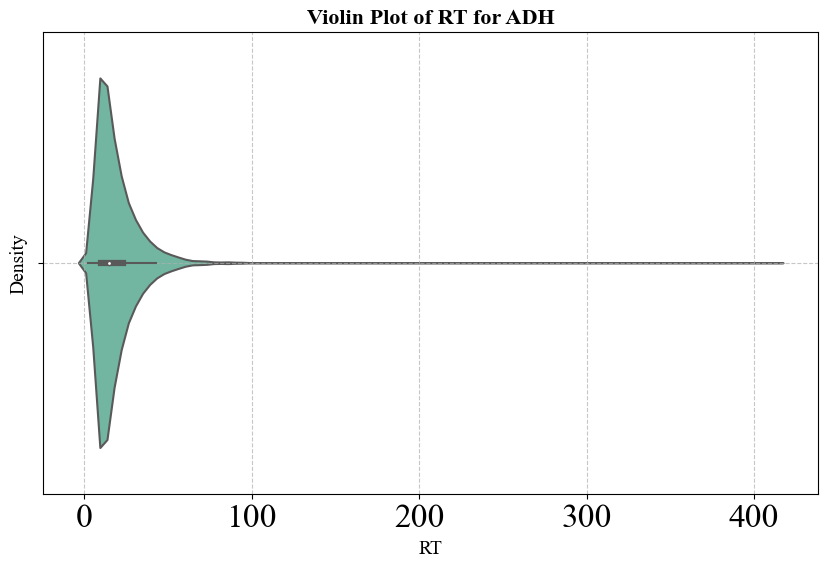

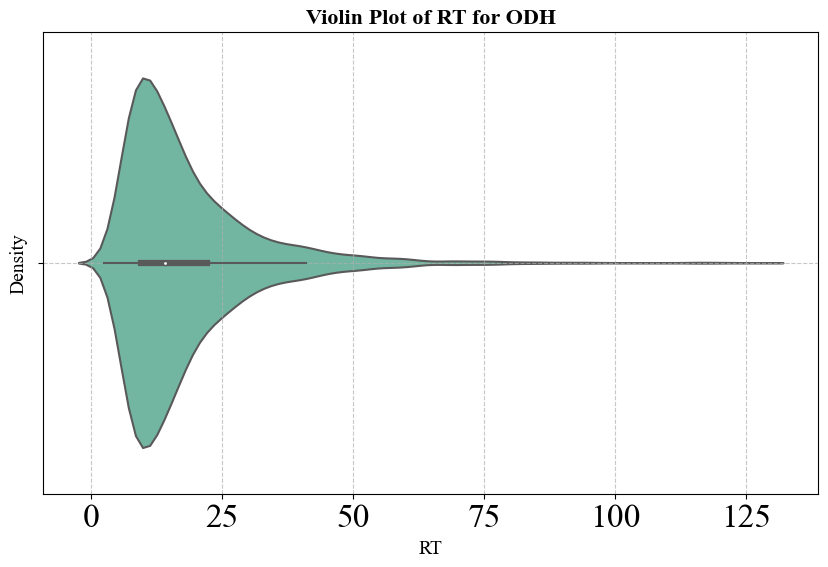

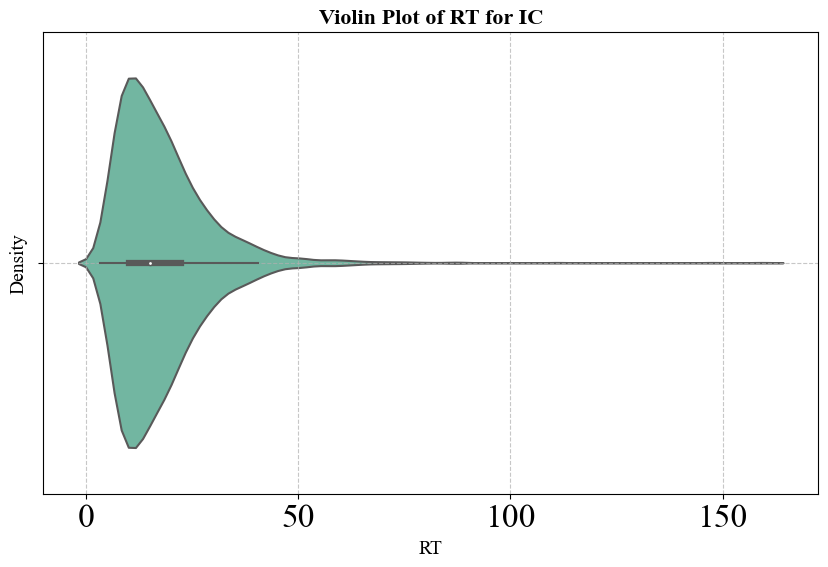

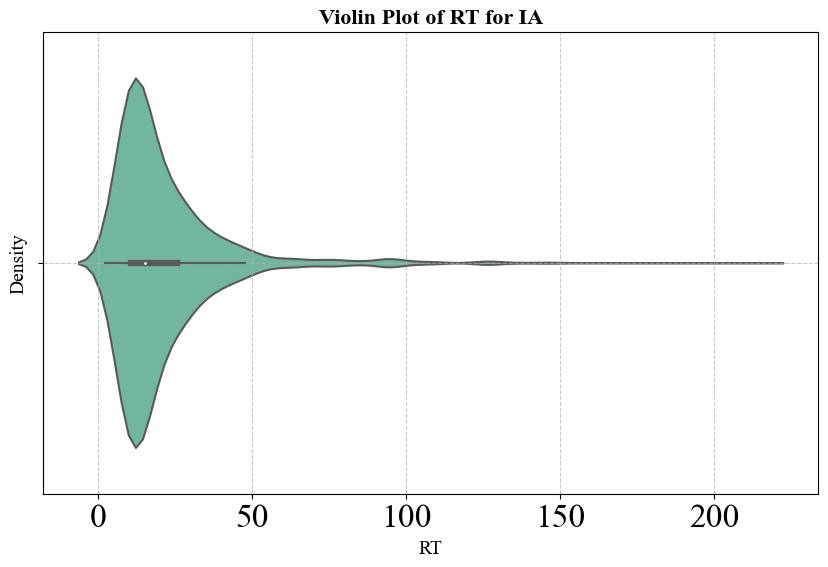

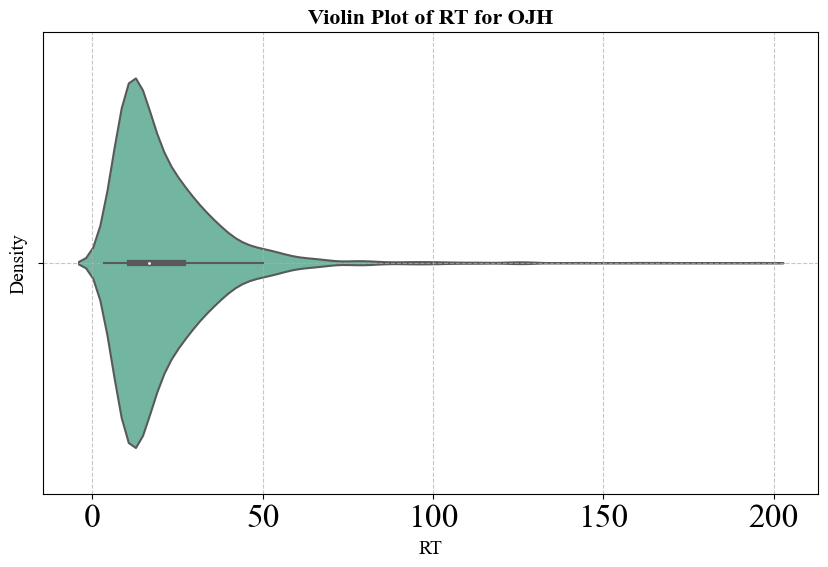

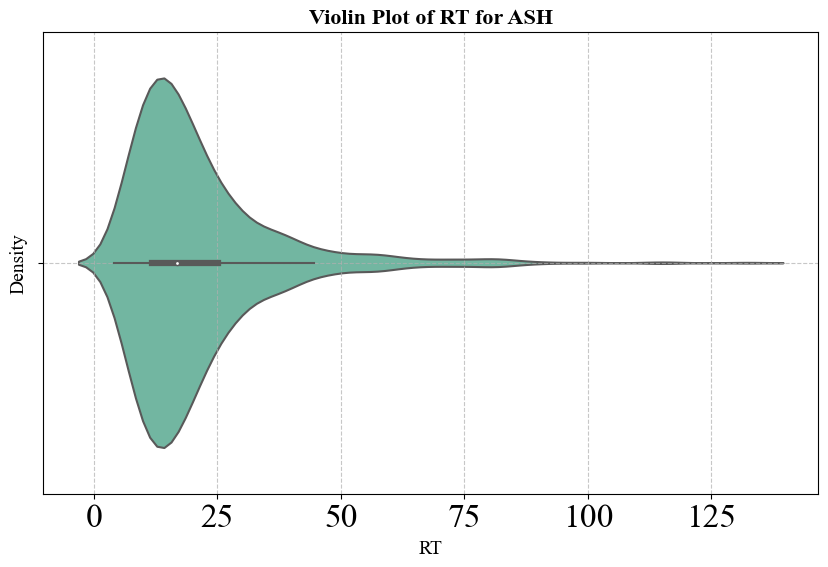

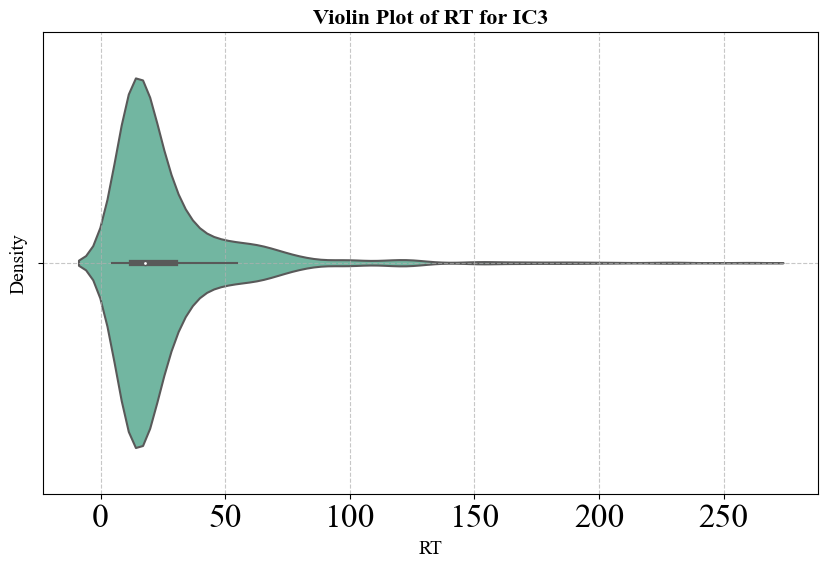

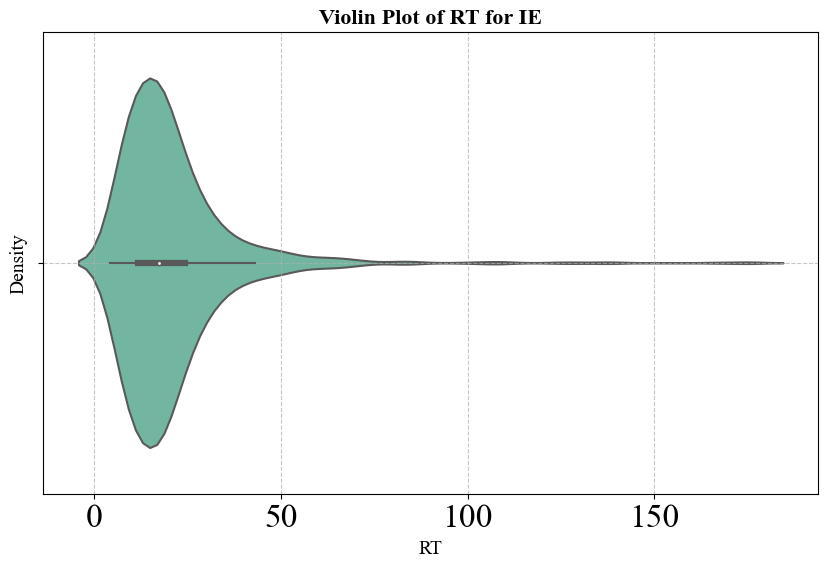

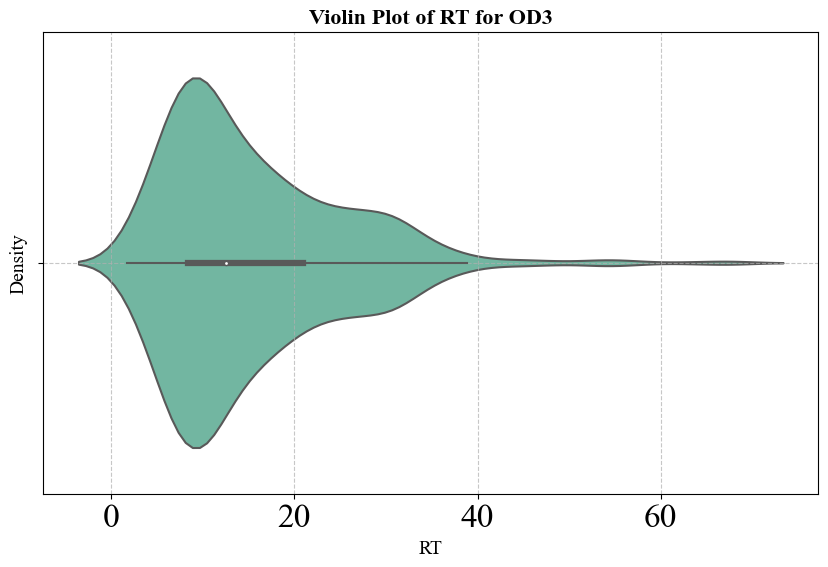

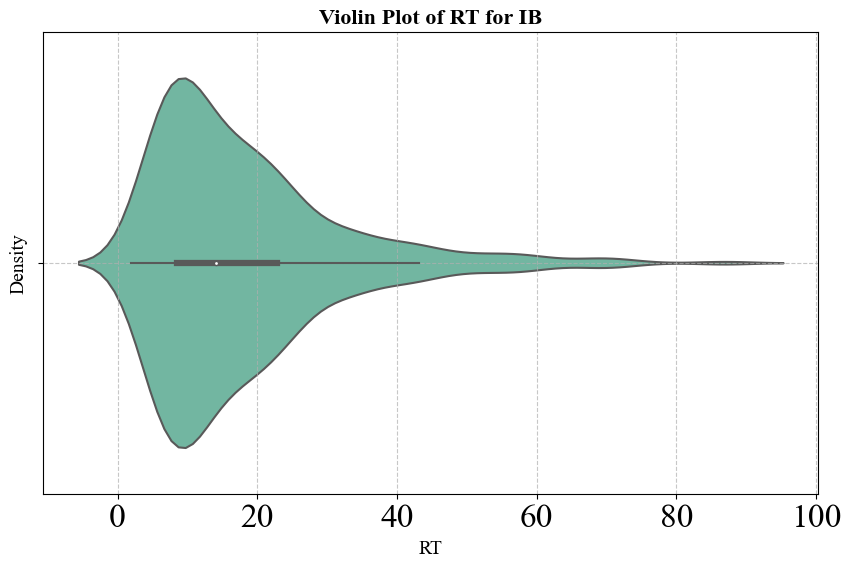

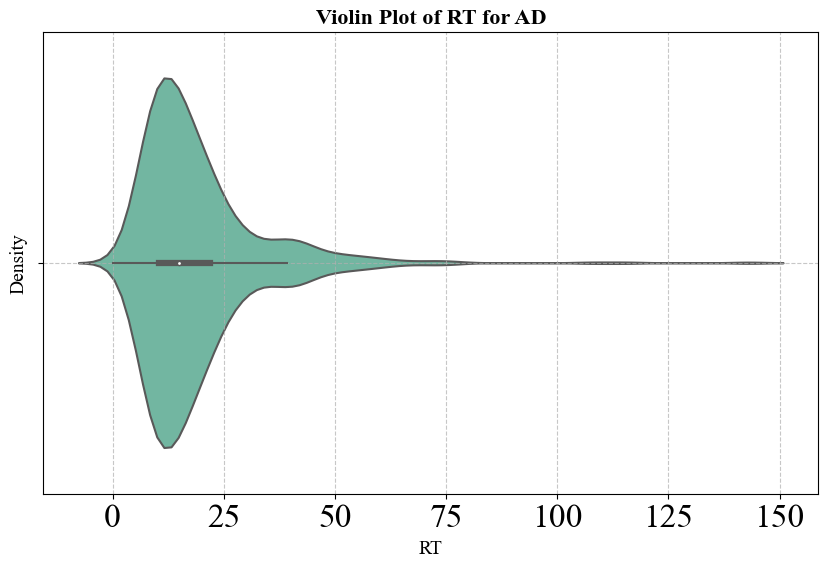

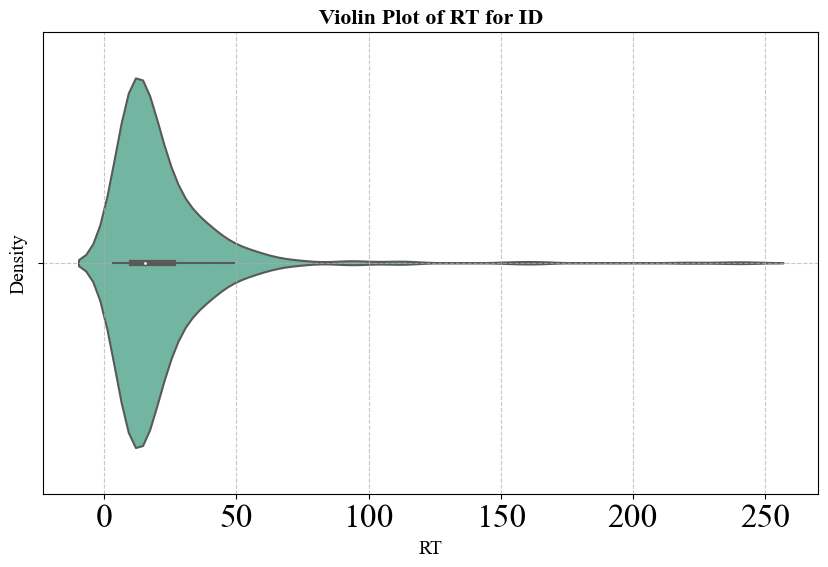

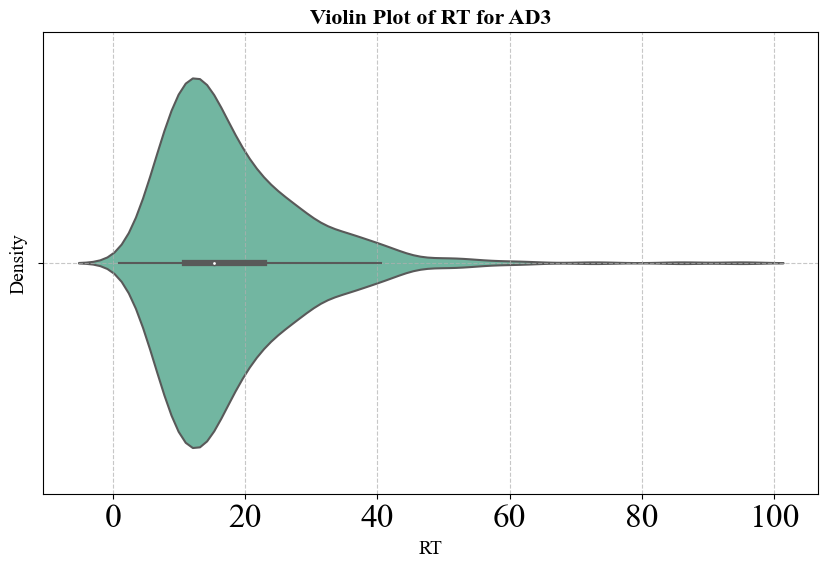

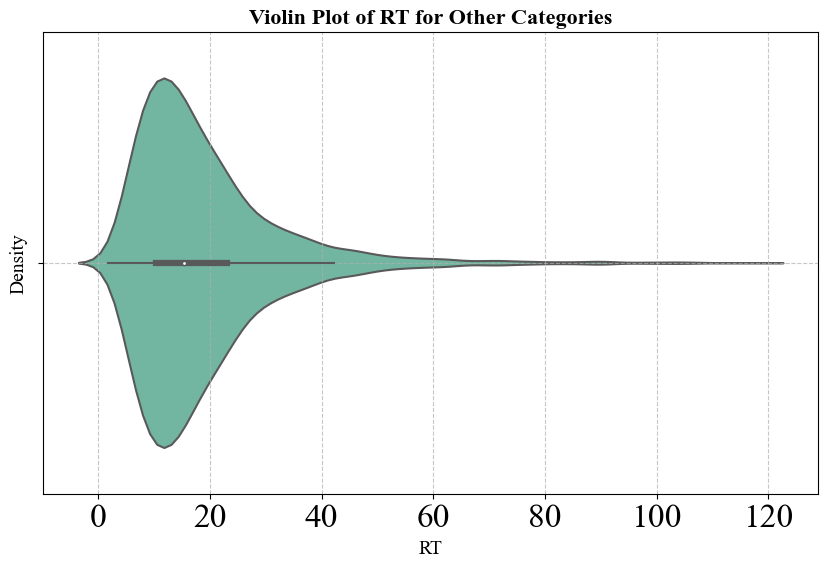

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/dataset/All_column_charity.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Pie Chart with 'Other' category for small percentages
category_column = 'Column'  # Replace with your actual category column name
distribution_column = 'RT'    # Replace with your actual distribution column name

# Calculate the value counts
pie_data = data[category_column].value_counts()

# Determine the threshold for 'Other' category
threshold = 0.02 * len(data)  # You can adjust the threshold as needed
main_categories = pie_data[pie_data > threshold]
other_categories = pie_data[pie_data <= threshold]

# Create a combined DataFrame for the main and other categories
combined_data = main_categories.copy()
combined_data['Other'] = other_categories.sum()

# Function to plot pie chart with total count in the center and save the plot
def plot_pie_with_total(pie_data, title):
    total = pie_data.sum()
    plt.figure(figsize=(10, 8))
    
    # Set font to Times New Roman and size to 18
    plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24})
    
    # Create pie chart with adjusted labeldistance and pctdistance
    wedges, texts, autotexts = plt.pie(
        pie_data, 
        labels=pie_data.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'), 
        pctdistance=0.85,  # Move percentages closer to the edge
        labeldistance=1.1  # Move labels closer to the edge
    )

    # Rotate percentages to align with radial direction
    for autotext, wedge in zip(autotexts, wedges):
        angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
        x, y = np.cos(np.radians(angle)), np.sin(np.radians(angle))
        autotext.set_rotation(angle)  # Set rotation to match wedge angle
        autotext.set_horizontalalignment('center')  # Center-align text
        autotext.set_verticalalignment('center')  # Center-align text
        autotext.set_position((0.8 * x, 0.8 * y))  # Adjust position closer to edge

    plt.title(title, fontsize=24, fontweight='bold')
    plt.text(0, 0, f'Total: {total}', ha='center', va='center', fontsize=24, fontweight='bold')
    plt.savefig(f"figdatadistribution/{title}.png", bbox_inches='tight')
    plt.show()
# Plot the main pie chart
plot_pie_with_total(combined_data, f'Distribution of {category_column}')

# Plot the detailed pie chart for 'Other' category if it exists
if 'Other' in combined_data:
    plot_pie_with_total(other_categories, f'Distribution of {category_column} in "Other" Category')

# Function to plot Violin plot and save the plot
def plot_violin(data, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data, palette='Set2')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(f"figdatadistribution/{title}.png", bbox_inches='tight')
    plt.show()

# Distribution Violin Plots for each main category
for category in main_categories.index:
    category_data = data[data[category_column] == category][distribution_column]
    plot_violin(category_data, f'Violin Plot of {distribution_column} for {category}', distribution_column)

# Distribution Violin Plots for 'Other' category
other_data = data[data[category_column].isin(other_categories.index)][distribution_column]
plot_violin(other_data, f'Violin Plot of {distribution_column} for Other Categories', distribution_column)



   Unnamed: 0  index                                             SMILES    RT  \
0           0      0  O=C(OC)N(C)[C@@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=C...  2.14   
1           1      0  O=C(OC)N(C)[C@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=CC=C2  1.81   
2           2      1      C=CCCCCCCC[C@@H](C[C@@]1(CCCC1=O)c2ccccc2)C=O  0.97   
3           3      2  C[C@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)(F)F  2.13   
4           4      2  C[C@@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)...  2.30   

   Speed  i-PrOH_proportion              Literature Column  
0    0.5           0.050000      10.1039/C9SC04534A    OJ3  
1    0.5           0.050000      10.1039/C9SC04534A    OJ3  
2    2.0           0.076923  10.1002/anie.202001100    AD3  
3    0.5           0.300000      10.1039/C8QO01291A     IA  
4    0.5           0.300000      10.1039/C8QO01291A     IA  
ADH    5418
ODH    4972
IC     2091
IA     1849
Name: Column, dtype: int64


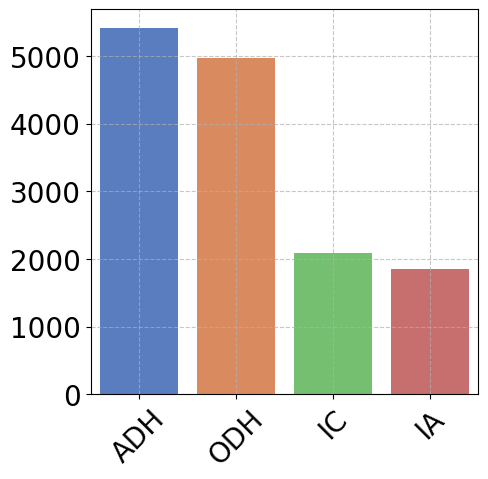

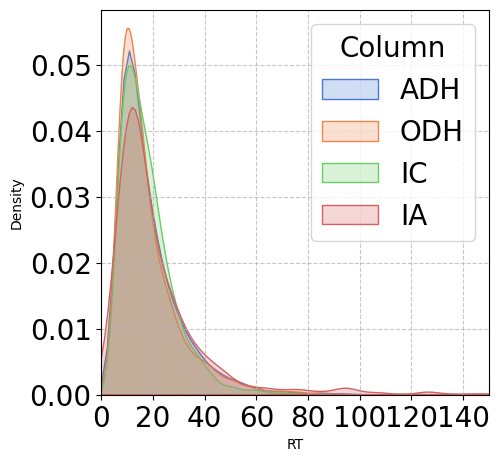

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = 'dataset/All_column_charity.csv'
data = pd.read_csv(file_path)

# 显示前几行数据
print(data.head())

# 顶部4个类别的计数
category_column = 'Column'
distribution_column = 'RT'

# 计算值计数
top_categories = data[category_column].value_counts().nlargest(4)
print(top_categories)

# 保存前4个类别的计数数据到CSV文件
top_categories_df = top_categories.reset_index()
top_categories_df.columns = [category_column, 'Count']
top_categories_df.to_csv(f"figdatadistribution/Top_4_Categories_Data.csv", index=False)

# 使用 Seaborn 的配色方案
palette = sns.color_palette('muted')

# 绘制前4个类别的柱状图
plt.figure(figsize=(5, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette=palette)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
# 保存为SVG格式
plt.savefig(f"figdatadistribution/Top_4_Categories.svg", bbox_inches='tight')
# 保存为PDF格式
plt.savefig(f"figdatadistribution/Top_4_Categories.pdf", bbox_inches='tight')

plt.show()

# 准备前4个类别的分布数据
distribution_data = []

for i, category in enumerate(top_categories.index):
    category_data = data[data[category_column] == category][distribution_column]
    category_df = pd.DataFrame({distribution_column: category_data, category_column: category})
    distribution_data.append(category_df)

# 合并所有类别的分布数据
distribution_data_df = pd.concat(distribution_data)

# 保存前4个类别的分布数据到CSV文件
distribution_data_df.to_csv(f"origin/RT_Distribution_Top_4_Categories_Data.csv", index=False)

# 绘制前4个类别的分布曲线图
plt.figure(figsize=(5, 5))
for i, category in enumerate(top_categories.index):
    category_data = data[data[category_column] == category][distribution_column]
    sns.kdeplot(category_data, label=category, fill=True, color=palette[i])

plt.legend(title=category_column, fontsize=20, title_fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 150)  # 设置横轴范围控制在150以内
# 保存为SVG格式
plt.savefig(f"figdatadistribution/RT_Distribution_Top_4_Categories.svg", bbox_inches='tight')
# 保存为PDF格式
plt.savefig(f"figdatadistribution/RT_Distribution_Top_4_Categories.pdf", bbox_inches='tight')

plt.show()



<Figure size 1200x3000 with 0 Axes>

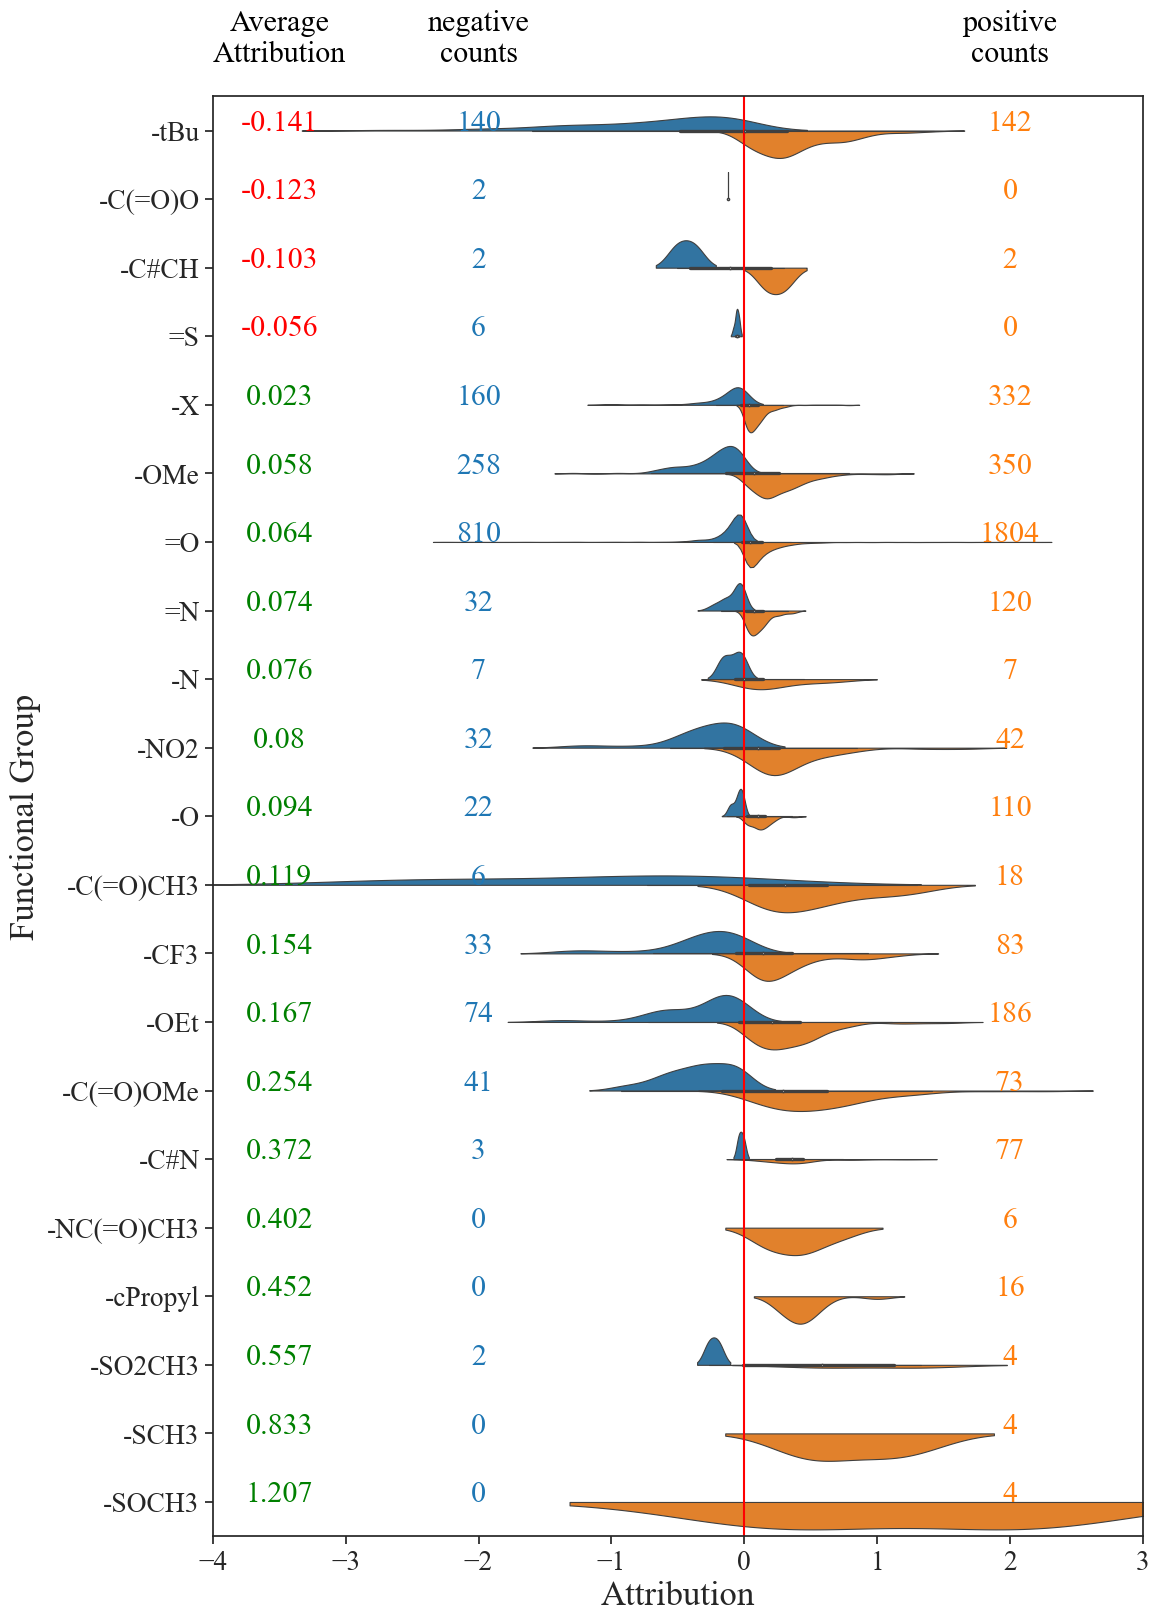

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def attr2tag(attr):
    return -1 if attr < 0 else 1
column='IA'
plt.figure(figsize=(12, 30))
colors = sns.color_palette('tab10', 2)
sns.set(font_scale=1.8, style='ticks')

# 设置字体为新罗马
plt.rcParams['font.family'] = 'Times New Roman'

# 读取数据
data = pd.read_csv(f'functional_group_contributions_{column}.csv')
summary_data = pd.read_csv(f'A_average_attribution_summary_{column}.csv')

# 添加标签
data['attribution_tag'] = data['Contribution'].apply(attr2tag)
sub_name_list = summary_data["Functional_Group"].tolist()

# 绘制分布图
fig, ax = plt.subplots(figsize=(12, 30))
sns.violinplot(y="Functional_Group", x="Contribution", hue="attribution_tag", data=data, palette=colors, split=True, order=sub_name_list, ax=ax, linewidth=0.8)

# 添加平均值标签
for index, row in summary_data.iterrows():
    mean_contribution = round(row.attribution_mean, 3)
    color = "red" if mean_contribution <= 0 else "green"
    ax.text(-3.5, index, mean_contribution, color=color, ha="center", fontfamily='Times New Roman')

ax.text(-3.5, -1, 'Average\nAttribution', color="Black", ha="center", fontfamily='Times New Roman')

# 计算并添加正负贡献类别的数量
positive_counts = data[data['attribution_tag'] == 1]['Functional_Group'].value_counts().reindex(sub_name_list, fill_value=0)
negative_counts = data[data['attribution_tag'] == -1]['Functional_Group'].value_counts().reindex(sub_name_list, fill_value=0)

for i, func_group in enumerate(sub_name_list):
    pos_count = positive_counts[func_group]
    neg_count = negative_counts[func_group]
    ax.text(2, i, pos_count, color=colors[1], ha="center", fontfamily='Times New Roman')  # 右侧正贡献数量
    ax.text(-2, i, neg_count, color=colors[0], ha="center", fontfamily='Times New Roman')  # 左侧负贡献数量
ax.text(2, -1, 'positive\ncounts', color="Black", ha="center", fontfamily='Times New Roman')
ax.text(-2, -1, 'negative\ncounts', color="Black", ha="center", fontfamily='Times New Roman')
# 设置标签和图例
font2 = {'weight': 'normal', 'size': 25}
ax.set_ylabel('Functional Group', font2, fontname='Times New Roman')
ax.set_xlabel('Attribution', font2, fontname='Times New Roman')
ax.axvline(0, color="red")
ax.legend([], [], frameon=False)

plt.subplots_adjust(bottom=0.4)
plt.xlim((-4, 3))
plt.savefig(f'{column}_fg_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



<Figure size 1200x3000 with 0 Axes>

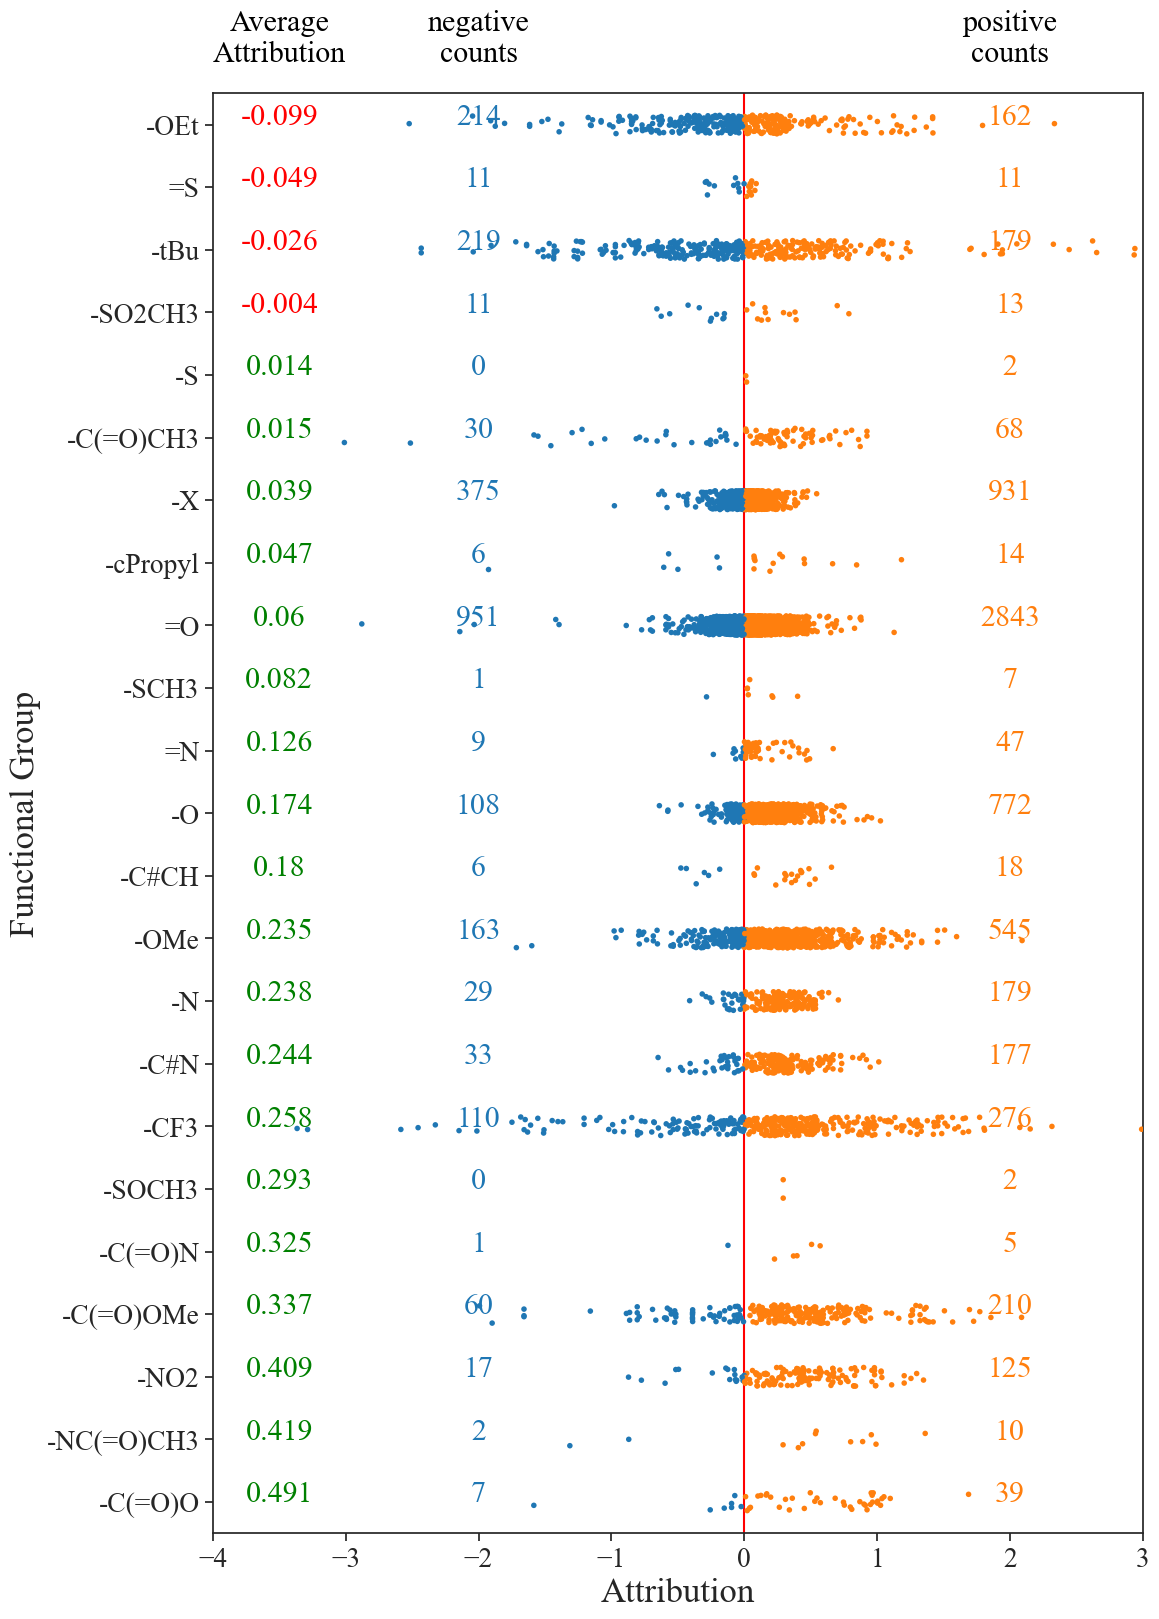

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def attr2tag(attr):
    return -1 if attr < 0 else 1
column='ODH'
plt.figure(figsize=(12, 30))
colors = sns.color_palette('tab10', 2)
sns.set(font_scale=1.8, style='ticks')

# 设置字体为新罗马
plt.rcParams['font.family'] = 'Times New Roman'

# 读取数据
data = pd.read_csv(f'functional_group_contributions_{column}.csv')
summary_data = pd.read_csv(f'A_average_attribution_summary_{column}.csv')

# 添加标签
data['attribution_tag'] = data['Contribution'].apply(attr2tag)
sub_name_list = summary_data["Functional_Group"].tolist()

# 绘制分布图
fig, ax = plt.subplots(figsize=(12, 30))
g = sns.stripplot(y="Functional_Group", x="Contribution", hue='attribution_tag', palette=colors, data=data,  jitter=0.15, order=sub_name_list, size=4)

# 添加平均值标签
for index, row in summary_data.iterrows():
    mean_contribution = round(row.attribution_mean, 3)
    color = "red" if mean_contribution <= 0 else "green"
    ax.text(-3.5, index, mean_contribution, color=color, ha="center", fontfamily='Times New Roman')

ax.text(-3.5, -1, 'Average\nAttribution', color="Black", ha="center", fontfamily='Times New Roman')

# 计算并添加正负贡献类别的数量
positive_counts = data[data['attribution_tag'] == 1]['Functional_Group'].value_counts().reindex(sub_name_list, fill_value=0)
negative_counts = data[data['attribution_tag'] == -1]['Functional_Group'].value_counts().reindex(sub_name_list, fill_value=0)

for i, func_group in enumerate(sub_name_list):
    pos_count = positive_counts[func_group]
    neg_count = negative_counts[func_group]
    ax.text(2, i, pos_count, color=colors[1], ha="center", fontfamily='Times New Roman')  # 右侧正贡献数量
    ax.text(-2, i, neg_count, color=colors[0], ha="center", fontfamily='Times New Roman')  # 左侧负贡献数量
ax.text(2, -1, 'positive\ncounts', color="Black", ha="center", fontfamily='Times New Roman')
ax.text(-2, -1, 'negative\ncounts', color="Black", ha="center", fontfamily='Times New Roman')
# 设置标签和图例
font2 = {'weight': 'normal', 'size': 25}
ax.set_ylabel('Functional Group', font2, fontname='Times New Roman')
ax.set_xlabel('Attribution', font2, fontname='Times New Roman')
ax.axvline(0, color="red")
ax.legend([], [], frameon=False)

plt.subplots_adjust(bottom=0.4)
plt.xlim((-4, 3))
plt.savefig(f'{column}_fg_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1600x4500 with 0 Axes>

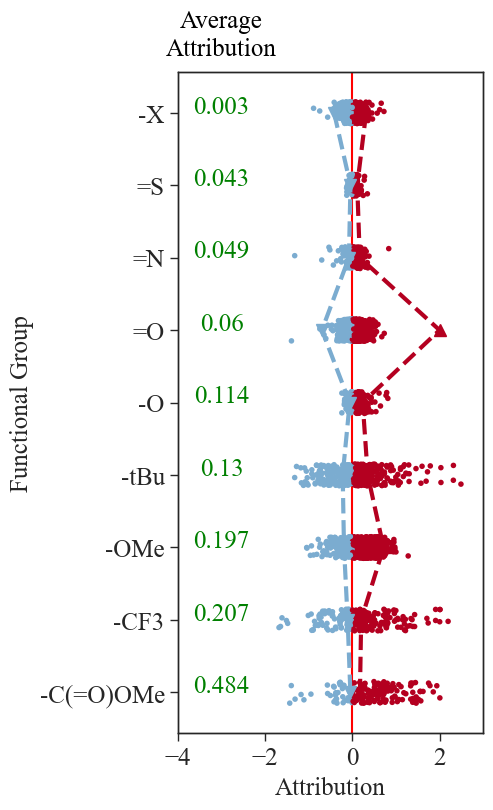

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def attr2tag(attr):
    return -1 if attr < 0 else 1

column = 'IC'
chiral = False  # Set this to True if considering chirality
enantiomer = False
count_threshold = 100 # 设定阈值为5，正计数加负计数的和大于该值的官能团将被保留
filter_by_count = True  # 是否启用过滤功能

plt.figure(figsize=(16, 45))
#colors = sns.color_palette('tab10', 2)
colors = ['#7BACD0','#B40020']
sns.set(font_scale=1.8, style='ticks')

# 全局字体大小设置
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'Times New Roman'

# 读取数据
if chiral:
    data = pd.read_csv(f'functional_group_contributions_{column}.csv')
    data = data[data['Chiral_Related'] == 'yes']
    summary_data = pd.read_csv(f'A_average_attribution_summary_{column}_chiral.csv')
else:
    if enantiomer:
        data = pd.read_csv(f'enantiomer_fg_contribution_diff_{column}.csv')
        summary_data = pd.read_csv(f'A_average_attribution_summary_enantiomer_{column}.csv')  
    else:      
        data = pd.read_csv(f'functional_group_contributions_{column}.csv')
        summary_data = pd.read_csv(f'A_average_attribution_summary_{column}.csv')

# 添加标签
data['attribution_tag'] = data['Contribution'].apply(attr2tag)
sub_name_list = summary_data["Functional_Group"].tolist()

# 计算正负贡献类别的数量
positive_counts = data[data['attribution_tag'] == 1]['Functional_Group'].value_counts().reindex(sub_name_list, fill_value=0)
negative_counts = data[data['attribution_tag'] == -1]['Functional_Group'].value_counts().reindex(sub_name_list, fill_value=0)

# 如果启用过滤功能，根据阈值过滤官能团
if filter_by_count:
    total_counts = positive_counts + negative_counts
    valid_groups = total_counts[total_counts > count_threshold].index
    data = data[data['Functional_Group'].isin(valid_groups)]
    summary_data = summary_data[summary_data['Functional_Group'].isin(valid_groups)]
    sub_name_list = valid_groups.tolist()

# 绘制贡献分布的strip plot
fig, ax1 = plt.subplots(figsize=(10/2.54, 35/2.54))
g = sns.stripplot(y="Functional_Group", x="Contribution", hue='attribution_tag', palette=colors, data=data, jitter=0.15, order=sub_name_list, size=4, ax=ax1)

# 添加平均值标签
for i, (index, row) in enumerate(summary_data.iterrows()):
    mean_contribution = round(row['attribution_mean'], 3)
    color = "red" if mean_contribution <= 0 else "green"
    ax1.text(-3, i, mean_contribution, color=color, ha="center", fontfamily='Times New Roman', fontsize=18)  # 设置文本字体大小

if chiral:
    ax1.text(-3.5, -0.5, 'Average\nAttribution', color="Black", ha="center", fontfamily='Times New Roman', fontsize=18)
else:    
    ax1.text(-3, -0.8, 'Average\nAttribution', color="Black", ha="center", fontfamily='Times New Roman', fontsize=18)

# 在同一幅图中添加 counts 的折线图
ax2 = ax1.twiny()  # 共享y轴，增加一个x轴

# 画正贡献的折线图，点形状为上三角，大小为8
ax2.plot(positive_counts[valid_groups].values, np.arange(len(valid_groups)), color=colors[1], label='Positive Counts', marker='^', linestyle='--', markersize=8, linewidth=3)

# 画负贡献的折线图，点形状为下三角，大小为8
ax2.plot(-negative_counts[valid_groups].values, np.arange(len(valid_groups)), color=colors[0], label='Negative Counts', marker='v', linestyle='--', markersize=8, linewidth=3)

# 获取正负counts的最大值，用于设置x轴范围
max_count = max(positive_counts.max(), negative_counts.max())
max_attr = max(abs(data['Contribution'].min()), data['Contribution'].max())

# 设置第一个x轴的范围，使它的0点与折线图的0点重合
ax1.set_xlim([-4, 3])
ax2.set_xlim([-max_count*2, max_count*1.5])

# 隐藏第二个x轴的标签，只展示两条折线
ax2.xaxis.set_visible(False)

# 设置刻度标签的字体大小
ax1.tick_params(axis='y', labelsize=18)  # y轴刻度字体大小
ax1.tick_params(axis='x', labelsize=18)  # x轴刻度字体大小

# 调整 ax1 的边框宽度
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1)  # 调整边框宽度

# 调整 ax1 的刻度线宽度
ax1.tick_params(width=1)  # 调整刻度线宽度

# 如果有第二个坐标轴 ax2，同样进行调整
for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(1)

ax2.tick_params(width=1)
# 设置标签和图例
font2 = {'weight': 'normal', 'size': 18}
ax1.set_ylabel('Functional Group', font2, fontname='Times New Roman')
ax1.set_xlabel('Attribution', font2, fontname='Times New Roman')
ax1.axvline(0, color="red")
ax1.legend([], [], frameon=False)

plt.subplots_adjust(bottom=0.4)

# 保存并显示图表
plt.savefig(f'{column}_fg_distribution_with_triangles.png', dpi=300, bbox_inches='tight')
plt.show()



/tmp/ipykernel_89115/1197955599.py:46: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Functional_Group", y="Contribution", data=data, order=summary_data["Functional_Group"], size=8, ax=ax1, palette=colors, jitter=0.2)
/tmp/ipykernel_89115/1197955599.py:46: UserWarning: 
The palette list has fewer values (1) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x="Functional_Group", y="Contribution", data=data, order=summary_data["Functional_Group"], size=8, ax=ax1, palette=colors, jitter=0.2)


<Figure size 2000x1000 with 0 Axes>

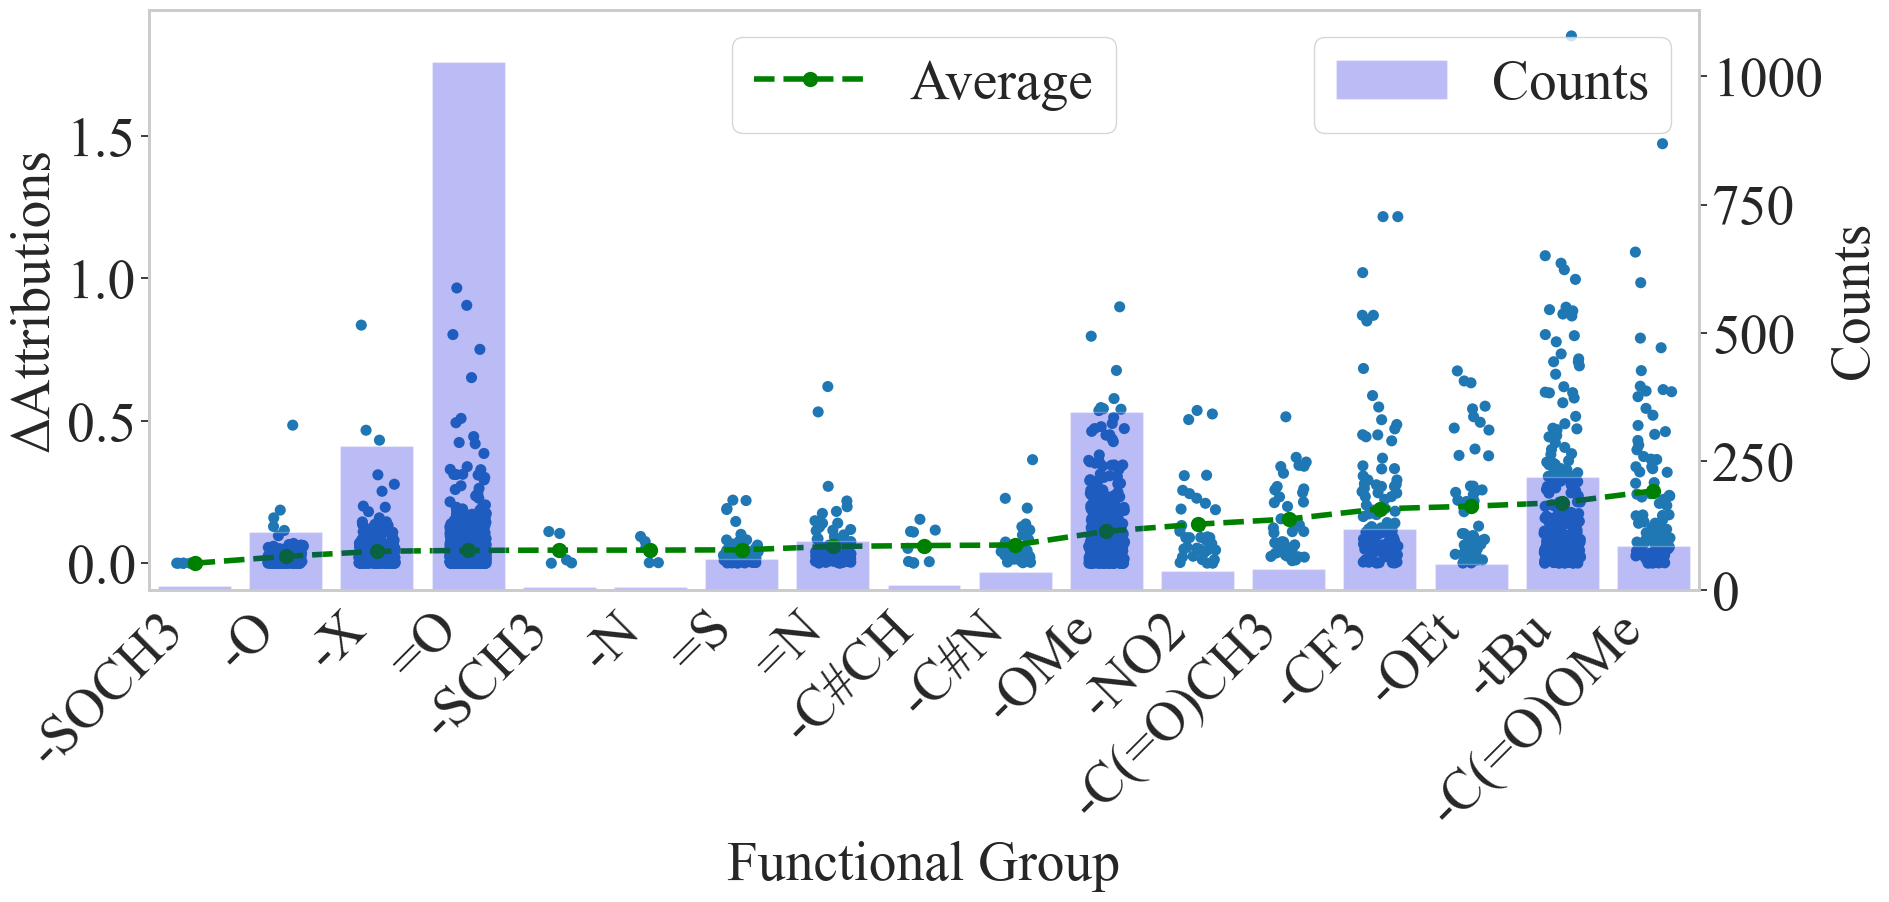

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 配置
column = 'IC'
enantiomer = True
# 设置阈值过滤参数
count_threshold =3  # 设定阈值，官能团出现次数超过该值才会被保留
filter_by_count = True  # 是否启用过滤功能
# 设置字体为新罗马
plt.rcParams['font.family'] = 'Times New Roman'

# 读取数据
data = pd.read_csv(f'enantiomer_fg_contribution_diff_{column}.csv')
summary_data = pd.read_csv(f'A_average_attribution_summary_enantiomer_{column}.csv')  

# 确保数据中只有正的贡献值
data = data[data['Contribution'] > 0]

# **计算每个官能团的贡献值数量**
positive_counts = data['Functional_Group'].value_counts()

# **如果启用过滤功能，根据阈值过滤官能团**
if filter_by_count:
    # 获取出现次数超过阈值的官能团列表
    valid_groups = positive_counts[positive_counts > count_threshold].index

    # 过滤数据和汇总数据
    data = data[data['Functional_Group'].isin(valid_groups)]
    summary_data = summary_data[summary_data['Functional_Group'].isin(valid_groups)]

    # 更新 positive_counts
    positive_counts = positive_counts[positive_counts > count_threshold]

# **按照 summary_data 的顺序重新索引 positive_counts**
positive_counts = positive_counts.reindex(summary_data["Functional_Group"], fill_value=0)
# 设置绘图的大小
plt.figure(figsize=(20, 10))
colors = sns.color_palette('tab10', 1)
sns.set(font_scale=1.5, style='whitegrid')

# 绘制贡献分布的strip plot
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.stripplot(x="Functional_Group", y="Contribution", data=data, order=summary_data["Functional_Group"], size=8, ax=ax1, palette=colors, jitter=0.2)

# 添加每个官能团的平均贡献值标签，并将其连接成折线

mean_contributions = []
for i, (index, row) in enumerate(summary_data.iterrows()):
    mean_contribution = round(row['attribution_mean'], 3)
    mean_contributions.append(mean_contribution)  # 保存平均贡献值
    # ax1.text(i, mean_contribution + 0.1, f'{mean_contribution}', color="green", ha="center", va="center", fontfamily='Times New Roman', fontsize=22,zorder=5, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# 绘制折线将平均贡献值连接起来
mean_line = ax1.plot(
    np.arange(len(mean_contributions)),
    mean_contributions,
    color='green',
    linestyle='--',
    linewidth=4,        # 增加线宽
    marker='o',
    markersize=10,      # 增大标记尺寸
    label='Average',
    zorder=4            # 提高 zorder，使其在散点之上
)
# 添加正贡献计数的柱状图
ax2 = ax1.twinx()  # 共享x轴，增加一个y轴
bars = sns.barplot(x=positive_counts.index, y=positive_counts.values, ax=ax2, alpha=0.3, color='blue', label='Counts')  # 调整透明度为0.3

# 设置右侧y轴范围
ax2.set_ylim(0, max(positive_counts.values) * 1.1)

# 设置右侧y轴标签
ax2.set_ylabel('Counts', fontsize=40, fontname='Times New Roman')

# 去掉网格线
ax1.grid(False)
ax2.grid(False)
# 设置标签和图例
ax1.set_xlabel('Functional Group', fontsize=40, fontname='Times New Roman')  # 设置x轴标签字体大小
ax1.set_ylabel('ΔAttributions', fontsize=40, fontname='Times New Roman')     # 设置左y轴标签字体大小

# 设置x轴标签的旋转角度
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right", fontsize=30,fontfamily='Times New Roman')  # 改变x轴标签字体大小
for label in ax1.get_xticklabels():
    label.set_fontname('Times New Roman')

for label in ax1.get_yticklabels():
    label.set_fontname('Times New Roman')

for label in ax2.get_yticklabels():
    label.set_fontname('Times New Roman')
# 设置刻度标签的字体大小
ax1.tick_params(axis='x', labelsize=40)
ax1.tick_params(axis='y', labelsize=40)
ax2.tick_params(axis='y', labelsize=40)

# **调整坐标轴边框线的厚度**
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(2)  # 将边框线宽度设为 2，可以根据需要调整数值
    ax2.spines[axis].set_linewidth(2)

# 添加图例并设置图例字体大小
lines_labels = ax1.get_legend_handles_labels()
bars_labels = ax2.get_legend_handles_labels()
ax1.legend(*lines_labels, loc='upper center',prop={'size':40,'family': 'Times New Roman'})  # 折线图图例
ax2.legend(*bars_labels, loc='upper right', prop={'size':40,'family': 'Times New Roman'})  # 柱状图图例

# 调整布局
plt.subplots_adjust(bottom=0.3)

# 保存并显示图表
plt.savefig(f'{column}_fg_distribution_horizontal_with_line_and_legend.png', dpi=300, bbox_inches='tight')
plt.show()



/tmp/ipykernel_44787/634292879.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/tmp/ipykernel_44787/634292879.py:49: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


<Figure size 2000x1000 with 0 Axes>

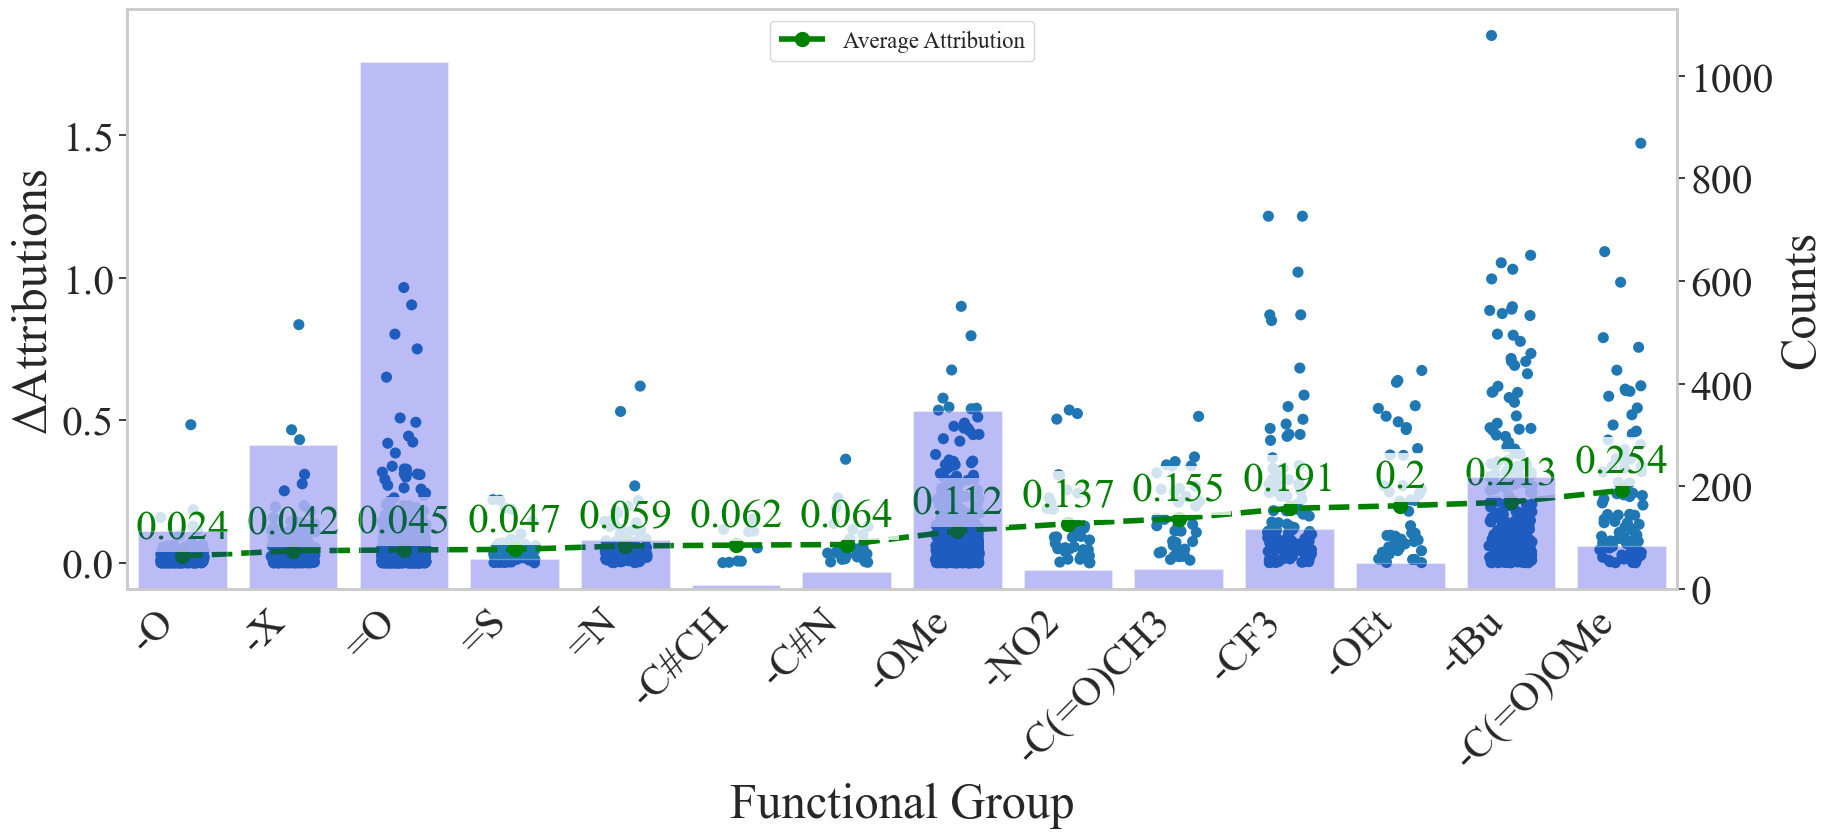

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 配置
column = 'IC'
enantiomer = True

# 设置阈值过滤参数
count_threshold = 7  # 设定阈值，官能团出现次数超过该值才会被保留
filter_by_count = True  # 是否启用过滤功能

# **设置字体为 Times New Roman**
plt.rcParams['font.family'] = 'Times New Roman'

# 读取数据
data = pd.read_csv(f'enantiomer_fg_contribution_diff_{column}.csv')
summary_data = pd.read_csv(f'A_average_attribution_summary_enantiomer_{column}.csv')  

# 确保数据中只有正的贡献值
data = data[data['Contribution'] > 0]

# 计算每个官能团的贡献值数量
positive_counts = data['Functional_Group'].value_counts()

# 如果启用过滤功能，根据阈值过滤官能团
if filter_by_count:
    # 获取出现次数超过阈值的官能团列表
    valid_groups = positive_counts[positive_counts > count_threshold].index

    # 过滤数据和汇总数据
    data = data[data['Functional_Group'].isin(valid_groups)]
    summary_data = summary_data[summary_data['Functional_Group'].isin(valid_groups)]

    # 更新 positive_counts
    positive_counts = positive_counts[positive_counts > count_threshold]

# 按照 summary_data 的顺序重新索引 positive_counts
positive_counts = positive_counts.reindex(summary_data["Functional_Group"], fill_value=0)

# 设置绘图的大小
plt.figure(figsize=(20, 10))
colors = sns.color_palette('tab10', 1)
sns.set(font_scale=1.5, style='whitegrid')

# 绘制贡献分布的 strip plot
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.stripplot(
    x="Functional_Group",
    y="Contribution",
    data=data,
    order=summary_data["Functional_Group"],
    size=8,
    ax=ax1,
    palette=colors,
    jitter=0.2
)

# 添加每个官能团的平均贡献值标签，并将其连接成折线
mean_contributions = []
for i, (index, row) in enumerate(summary_data.iterrows()):
    mean_contribution = round(row['attribution_mean'], 3)
    mean_contributions.append(mean_contribution)  # 保存平均贡献值
    # **在这里提高文本的 zorder，并添加背景框**
    ax1.text(
        i,
        mean_contribution + 0.1,
        f'{mean_contribution}',
        color="green",
        ha="center",
        va="center",
        fontfamily='Times New Roman',
        fontsize=30,
        zorder=5,  # 提高 zorder，使其在最上层
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')  # 添加背景框
    )

# 绘制折线将平均贡献值连接起来，并调整其样式使其更明显
mean_line = ax1.plot(
    np.arange(len(mean_contributions)),
    mean_contributions,
    color='green',
    linestyle='--',
    linewidth=4,        # 增加线宽
    marker='o',
    markersize=10,      # 增大标记尺寸
    label='Average Attribution',
    zorder=4            # 提高 zorder，使其在散点之上
)

# 添加正贡献计数的柱状图
ax2 = ax1.twinx()  # 共享 x 轴，增加一个 y 轴
bars = sns.barplot(
    x=positive_counts.index,
    y=positive_counts.values,
    ax=ax2,
    alpha=0.3,
    color='blue',
    label='Counts',
    zorder=1  # 将 zorder 设置较低
)

# 设置右侧 y 轴范围
ax2.set_ylim(0, max(positive_counts.values) * 1.1)

# 设置右侧 y 轴标签
ax2.set_ylabel('Counts', fontsize=35, fontname='Times New Roman')

# 去掉网格线
ax1.grid(False)
ax2.grid(False)

# 设置标签和图例
ax1.set_xlabel('Functional Group', fontsize=35, fontname='Times New Roman')
ax1.set_ylabel('ΔAttributions', fontsize=35, fontname='Times New Roman')

# 设置 x 轴标签的旋转角度
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    ha="right",
    fontsize=30,
    fontfamily='Times New Roman'  # 确保字体为 Times New Roman
)

# 设置刻度标签的字体大小和字体
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax2.tick_params(axis='y', labelsize=30)

for label in ax1.get_xticklabels():
    label.set_fontname('Times New Roman')

for label in ax1.get_yticklabels():
    label.set_fontname('Times New Roman')

for label in ax2.get_yticklabels():
    label.set_fontname('Times New Roman')

# 调整坐标轴边框线的厚度
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(2)
    ax2.spines[axis].set_linewidth(2)

# # 添加图例并设置图例字体大小和字体
lines_labels = ax1.get_legend_handles_labels()
# bars_labels = ax2.get_legend_handles_labels()
ax1.legend(
     lines_labels[0],
    lines_labels[1],
    loc='upper center',
    fontsize=35,
    prop={'family': 'Times New Roman'}
 )
# ax2.legend(
#     bars_labels[0],
#     bars_labels[1],
#     loc='upper right',
#     fontsize=35,
#     prop={'family': 'Times New Roman'}
# )

# 调整布局
plt.subplots_adjust(bottom=0.3)

# 保存并显示图表
plt.savefig(
    f'{column}_fg_distribution_horizontal_with_line_and_legend.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()



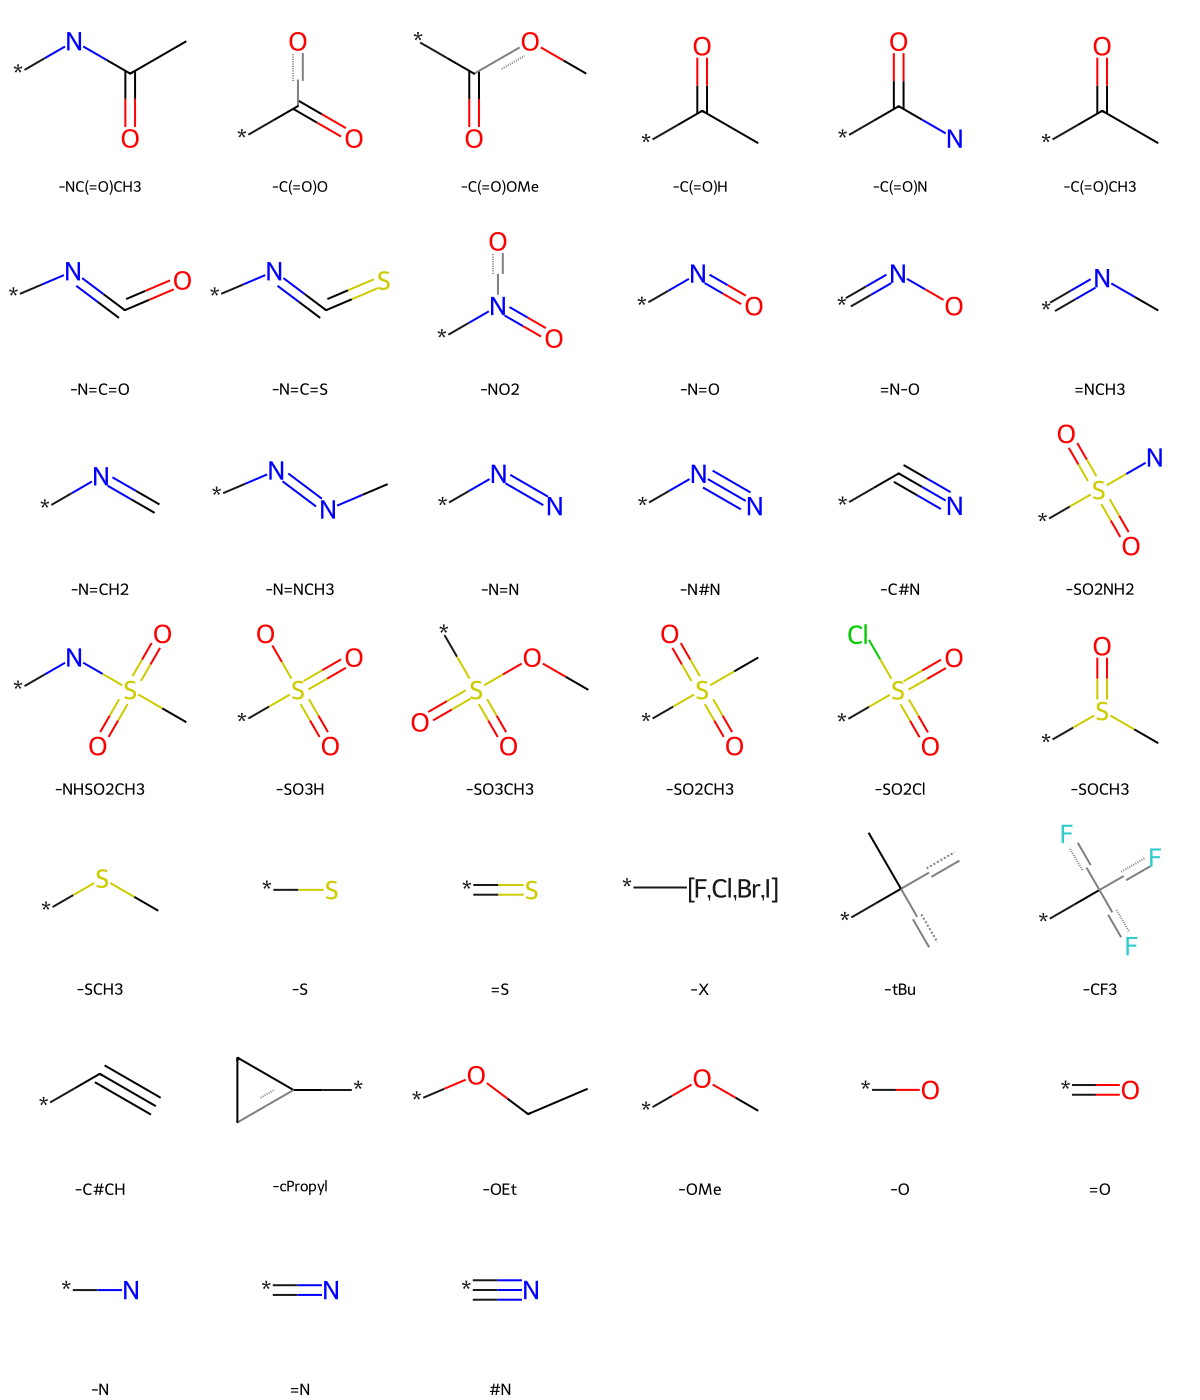

In [6]:
import os
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import FragmentCatalog
from rdkit.RDConfig import RDDataDir
import matplotlib.pyplot as plt

# 读取官能团配置文件
fName = os.path.join(RDDataDir, 'FunctionalGroups.txt')
fparams = FragmentCatalog.FragCatParams(1, 6, fName)

# 获取39种官能团及其名称
fg_with_ca_list = [fparams.GetFuncGroup(i) for i in range(39)]
fg_name_list = [fg.GetProp('_Name') for fg in fg_with_ca_list]

# 生成分子图像
mols = [fg for fg in fg_with_ca_list]
legends = [fg.GetProp('_Name') for fg in fg_with_ca_list]

# 使用 RDKit 生成图像
img = Draw.MolsToGridImage(mols, molsPerRow=6, subImgSize=(200, 200), legends=legends)

img


Scaffold: c1ccccc1, Count: 5


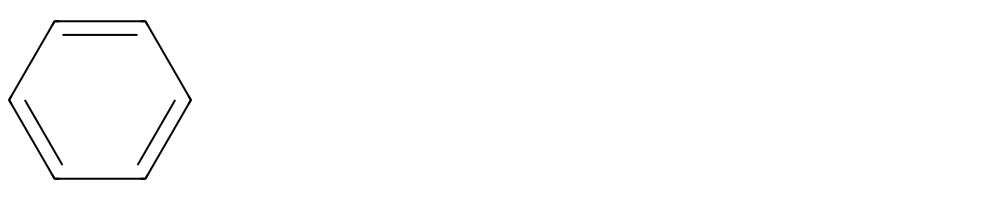

In [5]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import Counter

# 示例分子列表
molecules = [
    "CC(C)CC1=CC=CC=C1",
    "CC(C)CC1=CC=CC=C1O",
    "CC(C)CC1=CC=CC=C1N",
    "CC(C)CC1=CC=CC=C1F",
    "CC(C)CC1=CC=CC=C1Cl"
]

# 生成Murcko Scaffold
scaffolds = []

for smiles in molecules:
    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffolds.append(Chem.MolToSmiles(scaffold))

# 统计骨架出现频率
scaffold_counts = Counter(scaffolds)
common_scaffolds = scaffold_counts.most_common()

# 输出频率较高的骨架及其出现次数
for scaffold, count in common_scaffolds:
    print(f"Scaffold: {scaffold}, Count: {count}")
from rdkit.Chem import Draw

# 选择前几个频率较高的骨架进行可视化
top_n = 5
top_scaffolds = [Chem.MolFromSmiles(scaffold) for scaffold, _ in common_scaffolds[:top_n]]
img = Draw.MolsToGridImage(top_scaffolds, molsPerRow=5, subImgSize=(200, 200))

img



520
[   32    31    46    45    48    47   134   133   218   217   244   243
   250   249   257   256   275   274   298   297   310   309   324   323
   326   325   335   334   337   336   401   400   447   446   449   448
   469   468   473   472   478   477   506   507   508   509   603   602
   663   662   716   715   772   771   801   800   827   826   873   872
   946   945  1023  1022  1213  1214  1432  1431  1659  1658  1814  1815
  1928  1929  2083  2082  2113  2112  2115  2114  2357  2356  2552  2551
  2809  2808  3119  3120  3552  3553  3806  3807  3826  3827  3946  3947
  3983  3984  4095  4096  4168  4169  4176  4177  4488  4489  4678  4677
  4694  4695  4741  4742  4955  4956  5082  5083  5181  5182  5198  5199
  5387  5388  5551  5552  5553  5554  6021  6022  6093  6094  6261  6262
  6296  6297  6405  6406  6423  6424  6469  6470  6495  6496  6593  6592
  6642  6643  6975  6976  6993  6994  7032  7031  7036  7035  7174  7175
  7303  7302  7376  7377  7701  7702  8181  818

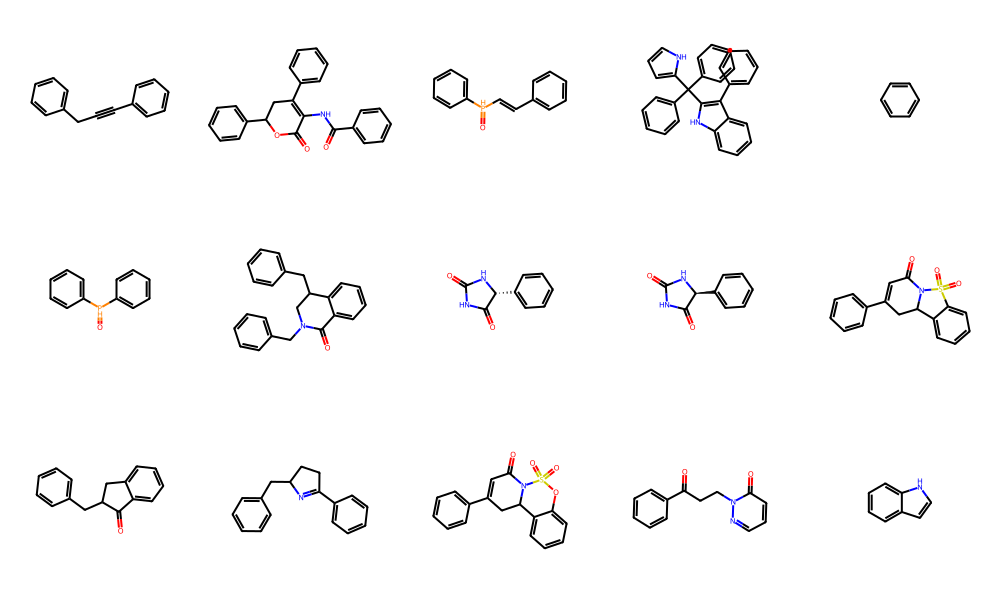

In [9]:
import pandas as pd
from collections import Counter
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# 设置文件路径
csv_file_path = '/home/jiaxinyan/geoGNNchiENN/Retention-Time-Prediction-for-Chromatographic-Enantioseparation-main/code/alphacsv/ADH_charity_0823.csv'

# 读取CSV文件
df = pd.read_csv(csv_file_path)

# 获取beta列数值大于2的所有索引
indexes = df[df['beta'] > 2]['Unnamed: 0'].values
print(len(indexes))
print(indexes)



# 提取分离因子大于2的分子的SMILES字符串
smiles_list = df[df['beta'] > 2]['SMILES'].values

# 生成Murcko Scaffold并统计频率
scaffolds = []

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffolds.append(Chem.MolToSmiles(scaffold))

scaffold_counts = Counter(scaffolds)
common_scaffolds = scaffold_counts.most_common()

# 输出频率较高的骨架及其出现次数
for scaffold, count in common_scaffolds:
    print(f"Scaffold: {scaffold}, Count: {count}")

# 可视化频率较高的骨架
top_n = 15  # 选择前几个频率较高的骨架进行可视化
top_scaffolds = [Chem.MolFromSmiles(scaffold) for scaffold, _ in common_scaffolds[:top_n]]
img = Draw.MolsToGridImage(top_scaffolds, molsPerRow=5, subImgSize=(200, 200))

img

In [2]:

# 提取分离因子大于2的分子的索引和SMILES字符串
subset_df = df[df['beta'] > 2].copy()
subset_df['index'] = subset_df['Unnamed: 0']

# 生成Murcko Scaffold并添加到数据框中
def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    return Chem.MolToSmiles(scaffold)

subset_df['scaffold'] = subset_df['SMILES'].apply(get_scaffold)

# 统计骨架频率
scaffold_counts = Counter(subset_df['scaffold'])
common_scaffolds = scaffold_counts.most_common()

# 输出频率较高的骨架及其出现次数
for scaffold, count in common_scaffolds:
    print(f"Scaffold: {scaffold}, Count: {count}")

# 可视化频率较高的骨架
top_n = 15  # 选择前15个频率较高的骨架进行可视化
top_scaffold_smiles = [scaffold for scaffold, _ in common_scaffolds[:top_n]]
top_scaffolds = [Chem.MolFromSmiles(scaffold) for scaffold in top_scaffold_smiles]
img = Draw.MolsToGridImage(top_scaffolds, molsPerRow=5, subImgSize=(200, 200))

# 找到这十五类骨架对应的分子序号并输出到文件
results = []

for scaffold in top_scaffold_smiles:
    matching_rows = subset_df[subset_df['scaffold'] == scaffold]
    for _, row in matching_rows.iterrows():
        results.append({'scaffold': scaffold, 'index': row['index'], 'SMILES': row['SMILES']})

results_df = pd.DataFrame(results)
results_df.to_csv('top_scaffolds_indices.csv', index=False)

print("已将结果输出到文件 'top_scaffolds_indices.csv'")


Scaffold: c1ccc(Cc2c[nH]c3ccccc23)cc1, Count: 20
Scaffold: O=C(c1ccccc1)C(Cc1ccccc1)C(=O)c1ccccc1, Count: 18
Scaffold: O=C1C[C@@]2(C(=O)N(Cc3ccccc3)c3ccccc32)C(C(=O)c2ccccc2)=CO1, Count: 12
Scaffold: O=C1C[C@]2(C(=O)N(Cc3ccccc3)c3ccccc32)C(C(=O)c2ccccc2)=CO1, Count: 12
Scaffold: S=C(Nc1ccccc1)N1CC(c2ccccc2)(c2ccccc2)C[C@H]1C=Cc1ccccc1, Count: 8
Scaffold: S=C(Nc1ccccc1)N1CC(c2ccccc2)(c2ccccc2)C[C@@H]1C=Cc1ccccc1, Count: 8
Scaffold: C1=CC2CC(c3ccccc3)=N[C@H]2C=C1, Count: 8
Scaffold: O=C(OCc1ccccc1)c1ccccc1, Count: 6
Scaffold: O=S(=O)(c1ccccc1)N1N=C(c2ccccc2)CC1c1ccccc1, Count: 6
Scaffold: C(#Cc1ccccc1)Cc1ccccc1, Count: 6
Scaffold: c1ccc(C(c2ccccc2)c2ccccc2)cc1, Count: 4
Scaffold: c1ccccc1, Count: 4
Scaffold: O=C(OC/C=C/c1ccccc1)c1ccccc1, Count: 4
Scaffold: c1ccc(Cc2ccccc2)cc1, Count: 4
Scaffold: c1ccc([C@@H]2NCCc3c2[nH]c2ccccc32)cc1, Count: 4
Scaffold: c1ccc([C@H]2NCCc3c2[nH]c2ccccc32)cc1, Count: 4
Scaffold: O=C(OCC1CCCCC1)C(c1ccccc1)(c1ccccc1)c1ccccc1, Count: 2
Scaffold: O=C(OCc1ccccc1)

520
[   32    31    46    45    48    47   134   133   218   217   244   243
   250   249   257   256   275   274   298   297   310   309   324   323
   326   325   335   334   337   336   401   400   447   446   449   448
   469   468   473   472   478   477   506   507   508   509   603   602
   663   662   716   715   772   771   801   800   827   826   873   872
   946   945  1023  1022  1213  1214  1432  1431  1659  1658  1814  1815
  1928  1929  2083  2082  2113  2112  2115  2114  2357  2356  2552  2551
  2809  2808  3119  3120  3552  3553  3806  3807  3826  3827  3946  3947
  3983  3984  4095  4096  4168  4169  4176  4177  4488  4489  4678  4677
  4694  4695  4741  4742  4955  4956  5082  5083  5181  5182  5198  5199
  5387  5388  5551  5552  5553  5554  6021  6022  6093  6094  6261  6262
  6296  6297  6405  6406  6423  6424  6469  6470  6495  6496  6593  6592
  6642  6643  6975  6976  6993  6994  7032  7031  7036  7035  7174  7175
  7303  7302  7376  7377  7701  7702  8181  818

/home/jiaxinyan/.conda/envs/hj1/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


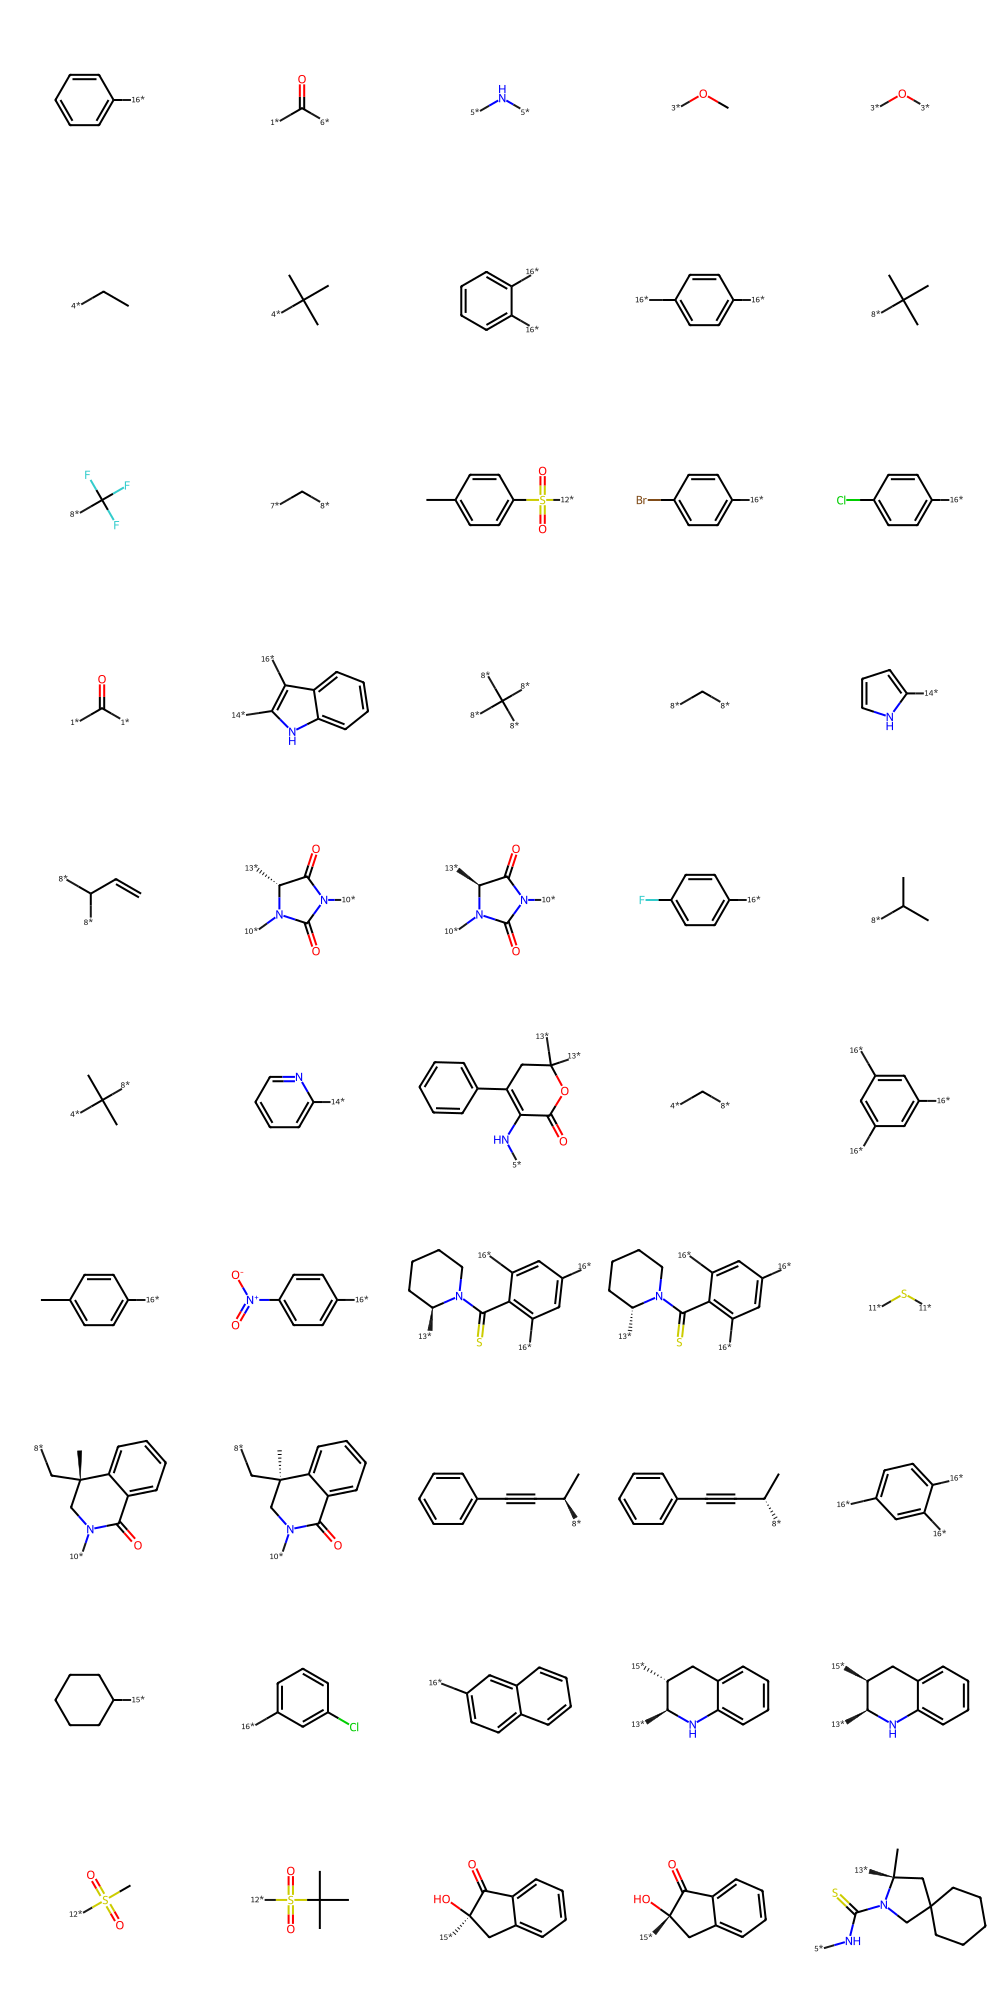

In [16]:
import pandas as pd
from collections import Counter
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import BRICS
from rdkit.Chem import Draw

# 设置文件路径
csv_file_path = '/home/jiaxinyan/geoGNNchiENN/Retention-Time-Prediction-for-Chromatographic-Enantioseparation-main/code/alphacsv/ADH_charity_0823.csv'

# 读取CSV文件
df = pd.read_csv(csv_file_path)

# 获取beta列数值大于2的所有索引
indexes = df[df['beta'] > 2]['Unnamed: 0'].values
print(len(indexes))
print(indexes)

# 给定的几个列表
lists = {
    1: [22212,22213,21986,21987,23812,23813,21116,21117,21978,21979,20149,20150,21820,21821,23816,23817,22211,22210,20074,20075,20999,6262,6297,6094,4956,5199,5388,6406,4678,4096,6022,6261,6495,4677,6405,6021,5387,5198,4095,4955,6093,6469,19071],
    2:[16282,16283,11096,11095,14274,14275,10896,14827,14826,11838,11837,14405,14404,13717,19634,19635,23606,24573,22932,25123,25124,22933,24574,2115],
    3:[19005,19004,19607,19608,19606,19605,20555,20554,19904,19903,20294,20293,20469,20470,19374,19373,15292,20897,20898,7036],
    4:[15873,15872,6643,8624,8623,6642,7702,7701,22840,22839,8870,11526,11525,24054,13221,13220,9006,9007,22737,22738,23199,23200,6975,6976,7376,7377,11544,11545,21177,21178,9391,9390,13475,13474,13524,13523,16685,16684,24484,23792,24909,24248,24910,24249,7175,7174,21964,21963,13140,13139,6994,6993],
    5:[298,448,449,243,244,326,325,447,446,478,477,257,256,469,468,401,400,310,309,275,274,335,334,2808,2809,324,323,2112,2113,2552,2551,473,472,945,946,662,663,872,873,249,250,1658,1659,218],
    6:[17810,17811,17808,17809,13714,13715,16933,16934,18127,18128,15671,15672,13569,13570,15643,15644,12213,12214,11246,11247,13116,13117,18630,18631,5552,5551,5554,5553,5182,5181,4168,4176,4169,4177,16863,16272,16271,15599,15598,13204,13203],
    7:[19504,18015,18016,19505,19736,17634,17635,20393,21547,17677,21355,16679,18941,21354,17676,21546,20392,16678,18940,9093,9092,19735,9698,9697,14557,12985,12984,14416,14415,8201,8200,17303,17302,15743,15742,15859,15858,24945,24944,8992,8991,23766,23765,9274,9273]
}

# 检查给定的列表是否是indexes的子集，并记录不在indexes中的元素
for key, value in lists.items():
    not_in_indexes = [item for item in value if item not in indexes]
    if not_in_indexes:
        print(f"Elements in list {key} not in indexes: {not_in_indexes}")

# 检查给定的列表是否是indexes的子集
for key, value in lists.items():
    assert all(item in indexes for item in value), f"List {key} is not a subset of indexes."

# 提取分离因子大于2的分子的SMILES字符串
smiles_list = df[df['beta'] > 2]['SMILES'].values

# 生成BRICS骨架并统计频率
scaffolds = []

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        frags = BRICS.BRICSDecompose(mol)
        scaffolds.extend(list(frags))

scaffold_counts = Counter(scaffolds)
common_scaffolds = scaffold_counts.most_common()

# 输出频率较高的骨架及其出现次数
for scaffold, count in common_scaffolds:
    print(f"Scaffold: {scaffold}, Count: {count}")

# 可视化频率较高的骨架
top_n = 100  # 选择前几个频率较高的骨架进行可视化
top_scaffolds = [Chem.MolFromSmiles(scaffold) for scaffold, _ in common_scaffolds[:top_n]]
img = Draw.MolsToGridImage(top_scaffolds, molsPerRow=5, subImgSize=(200, 200))

img

